# Data Homework: Chapter 13 (Mankiw)

Name:<u> Zach Johnson

Download the following data from [FRED](https://fred.stlouisfed.org/graph/?g=pUBj) using pandas_datareader.

>Real Imports: IMPGSC1
>
>Real Exports: EXPGSC1
>
>Real GDP: GDPC1
>
>Real Trade Weighted Dollar: TWEXBPA

In [1]:
import datetime
from datlib.plots import *
from datlib.FRED import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 40})

#Import monetary base
# {data_name1:data_code1,
#  data_name2:data_code2}
data_codes  = {"Real Imports": "IMPGSC1",
               "Real Exports": "EXPGSC1",
               "Real GDP": "GDPC1",
               "Real Trade Weighted Dollar": "TWEXBPA"}
# Select start and end dates
start = datetime.datetime(1947, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "Q")

In [2]:
data

,Real Imports,Real Exports,Real GDP,Real Trade Weighted Dollar
DATE,,,,
1947-03-31,60.396,97.630,2034.450,NaN
1947-06-30,61.559,96.399,2029.024,NaN
1947-09-30,54.594,91.506,2024.834,NaN
1947-12-31,57.538,81.139,2056.508,NaN
1948-03-31,64.883,77.437,2087.442,NaN
...,...,...,...,...
2020-12-31,3411.843,2279.025,18767.778,NaN
2021-03-31,3488.445,2262.347,19055.655,NaN
2021-06-30,3548.699,2304.164,19368.310,NaN


1.	Generate logged values for each variable.

In [3]:
for key, val in data.items():
    data["Log " + key] = np.log(val)
data["Net Real Exports"] = data["Real Exports"].sub(data["Real Imports"])
data["Net Real Exports (Log)"] = data["Log Real Exports"].sub(data["Log Real Imports"])

2.	Plot the logged values of each variable on a single graph

In [4]:
data

,Real Imports,Real Exports,Real GDP,Real Trade Weighted Dollar,Log Real Imports,Log Real Exports,Log Real GDP,Log Real Trade Weighted Dollar,Net Real Exports,Net Real Exports (Log)
DATE,,,,,,,,,,
1947-03-31,60.396,97.630,2034.450,NaN,4.100923,4.581185,7.617981,NaN,37.234,0.480262
1947-06-30,61.559,96.399,2029.024,NaN,4.119996,4.568496,7.615310,NaN,34.840,0.448500
1947-09-30,54.594,91.506,2024.834,NaN,3.999924,4.516405,7.613243,NaN,36.912,0.516481
1947-12-31,57.538,81.139,2056.508,NaN,4.052446,4.396164,7.628765,NaN,23.601,0.343718
1948-03-31,64.883,77.437,2087.442,NaN,4.172586,4.349465,7.643695,NaN,12.554,0.176879
...,...,...,...,...,...,...,...,...,...,...
2020-12-31,3411.843,2279.025,18767.778,NaN,8.135008,7.731503,9.839897,NaN,-1132.818,-0.403505
2021-03-31,3488.445,2262.347,19055.655,NaN,8.157211,7.724158,9.855119,NaN,-1226.098,-0.433053
2021-06-30,3548.699,2304.164,19368.310,NaN,8.174336,7.742473,9.871394,NaN,-1244.535,-0.431863


C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


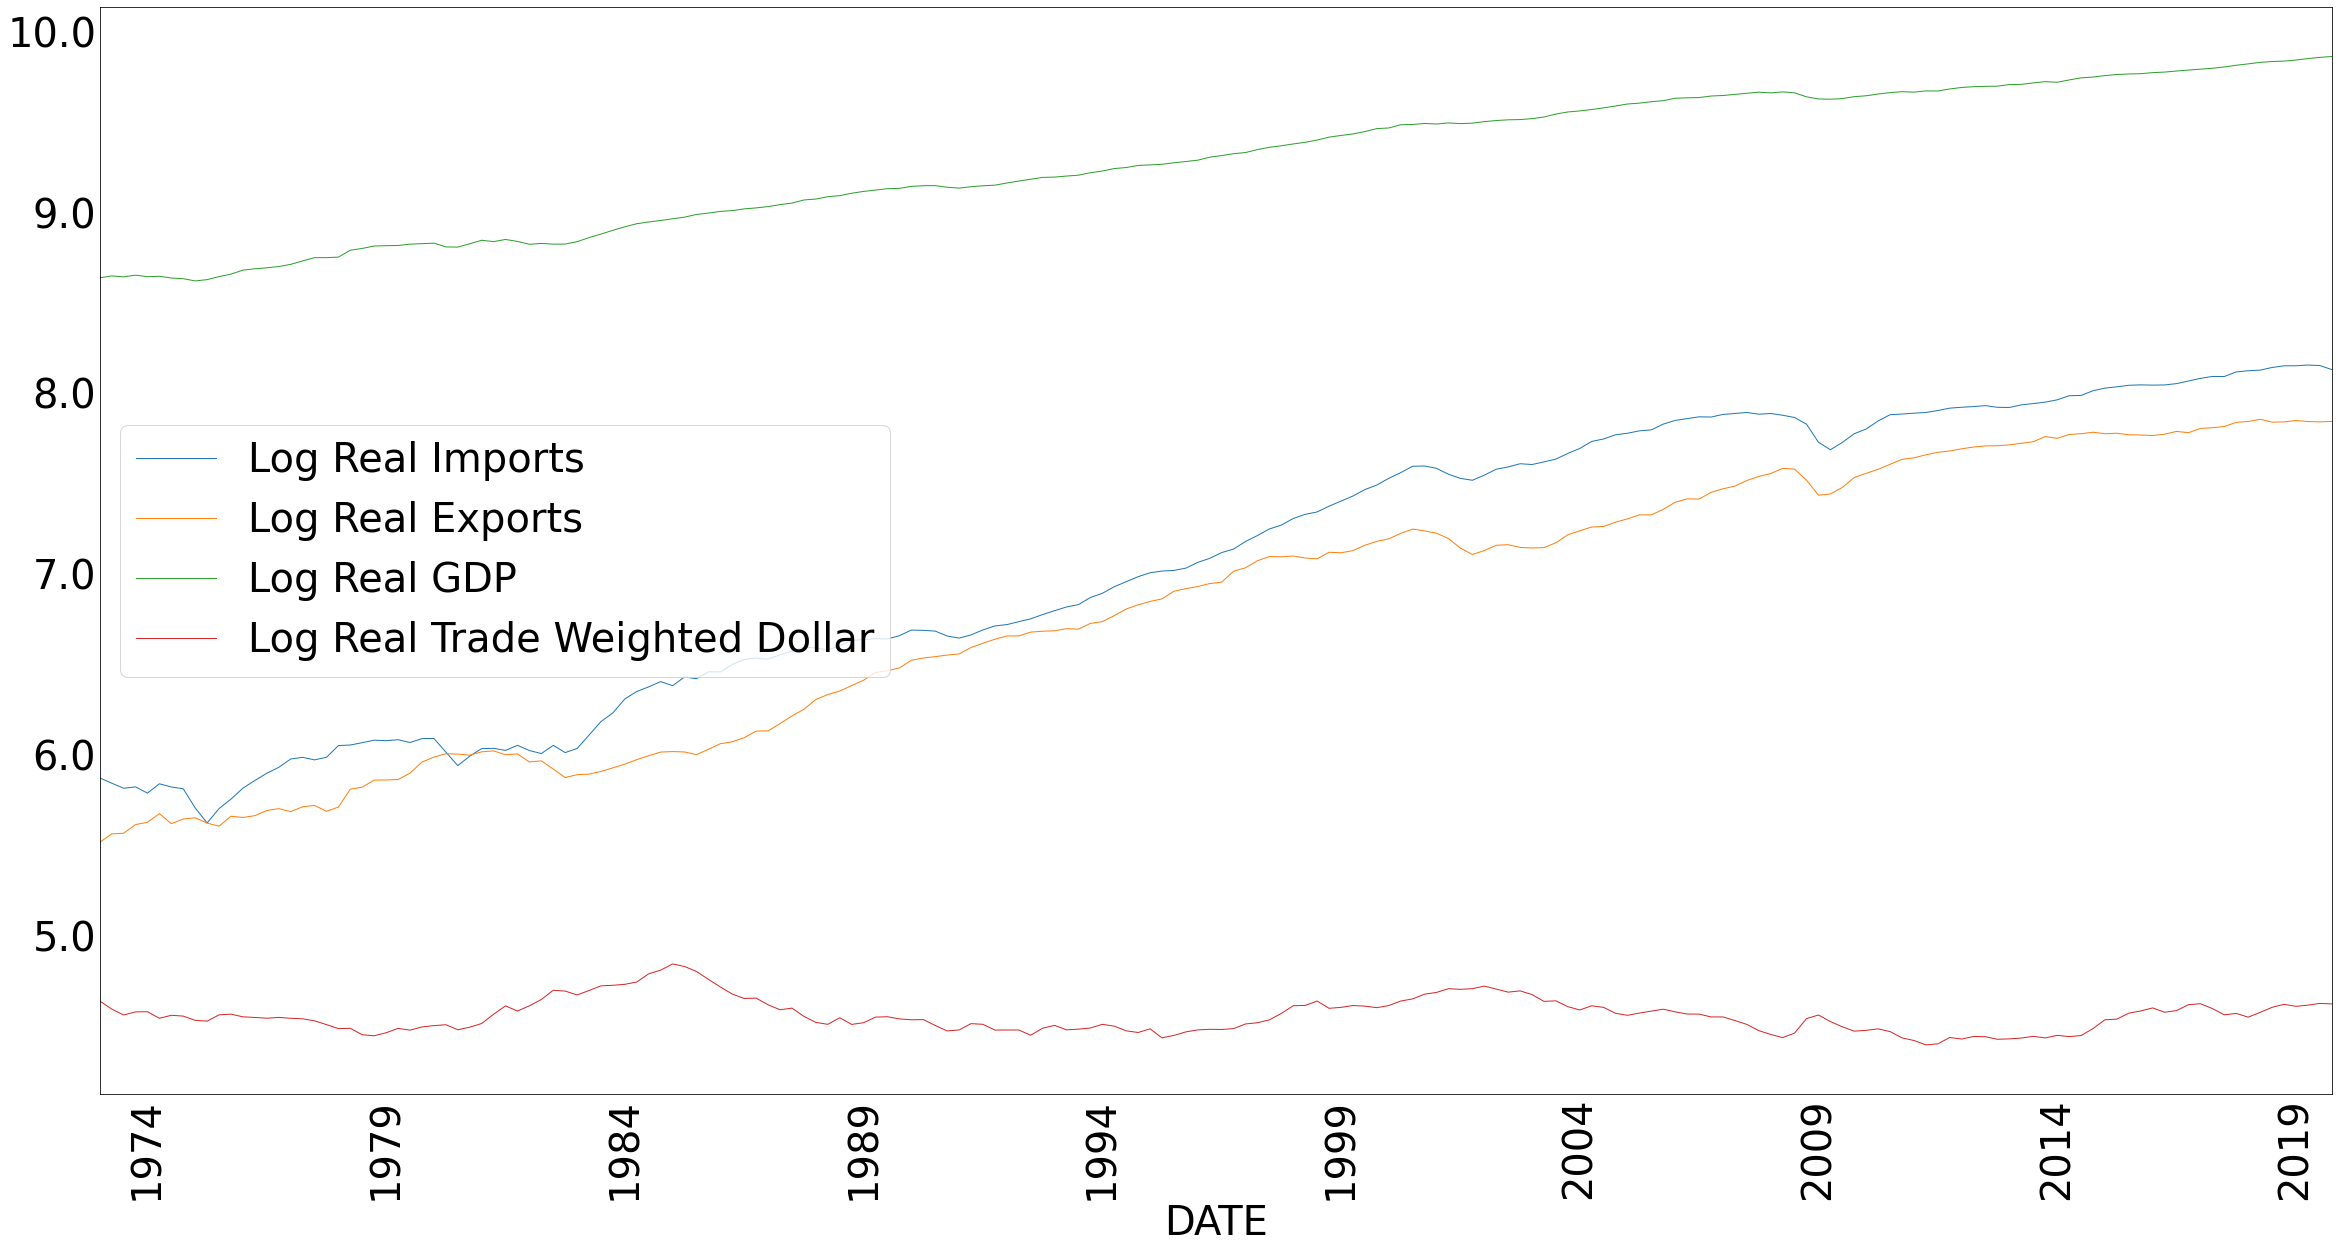

In [12]:
log_keys = data.keys()[4:8]
plot_lines(data[log_keys])

3.	Generate differenced logged values for each variable

In [5]:
keys = data.keys()
for key in keys: 
    if "Log" in key: 
        data[key + " Logged Difference"] = data[key].diff(1)

In [6]:
data

,Real Imports,Real Exports,Real GDP,Real Trade Weighted Dollar,Log Real Imports,Log Real Exports,Log Real GDP,Log Real Trade Weighted Dollar,Net Real Exports,Net Real Exports (Log),Log Real Imports Logged Difference,Log Real Exports Logged Difference,Log Real GDP Logged Difference,Log Real Trade Weighted Dollar Logged Difference,Net Real Exports (Log) Logged Difference
DATE,,,,,,,,,,,,,,,
1947-03-31,60.396,97.630,2034.450,NaN,4.100923,4.581185,7.617981,NaN,37.234,0.480262,NaN,NaN,NaN,NaN,NaN
1947-06-30,61.559,96.399,2029.024,NaN,4.119996,4.568496,7.615310,NaN,34.840,0.448500,0.019073,-0.012689,-0.002671,NaN,-0.031762
1947-09-30,54.594,91.506,2024.834,NaN,3.999924,4.516405,7.613243,NaN,36.912,0.516481,-0.120072,-0.052091,-0.002067,NaN,0.067981
1947-12-31,57.538,81.139,2056.508,NaN,4.052446,4.396164,7.628765,NaN,23.601,0.343718,0.052522,-0.120241,0.015522,NaN,-0.172762
1948-03-31,64.883,77.437,2087.442,NaN,4.172586,4.349465,7.643695,NaN,12.554,0.176879,0.120140,-0.046699,0.014930,NaN,-0.166839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,3411.843,2279.025,18767.778,NaN,8.135008,7.731503,9.839897,NaN,-1132.818,-0.403505,0.068011,0.050750,0.011091,NaN,-0.017261
2021-03-31,3488.445,2262.347,19055.655,NaN,8.157211,7.724158,9.855119,NaN,-1226.098,-0.433053,0.022203,-0.007345,0.015222,NaN,-0.029548
2021-06-30,3548.699,2304.164,19368.310,NaN,8.174336,7.742473,9.871394,NaN,-1244.535,-0.431863,0.017125,0.018315,0.016274,NaN,0.001190


4.	Plot the differenced logged values for each variable on a single graph.

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


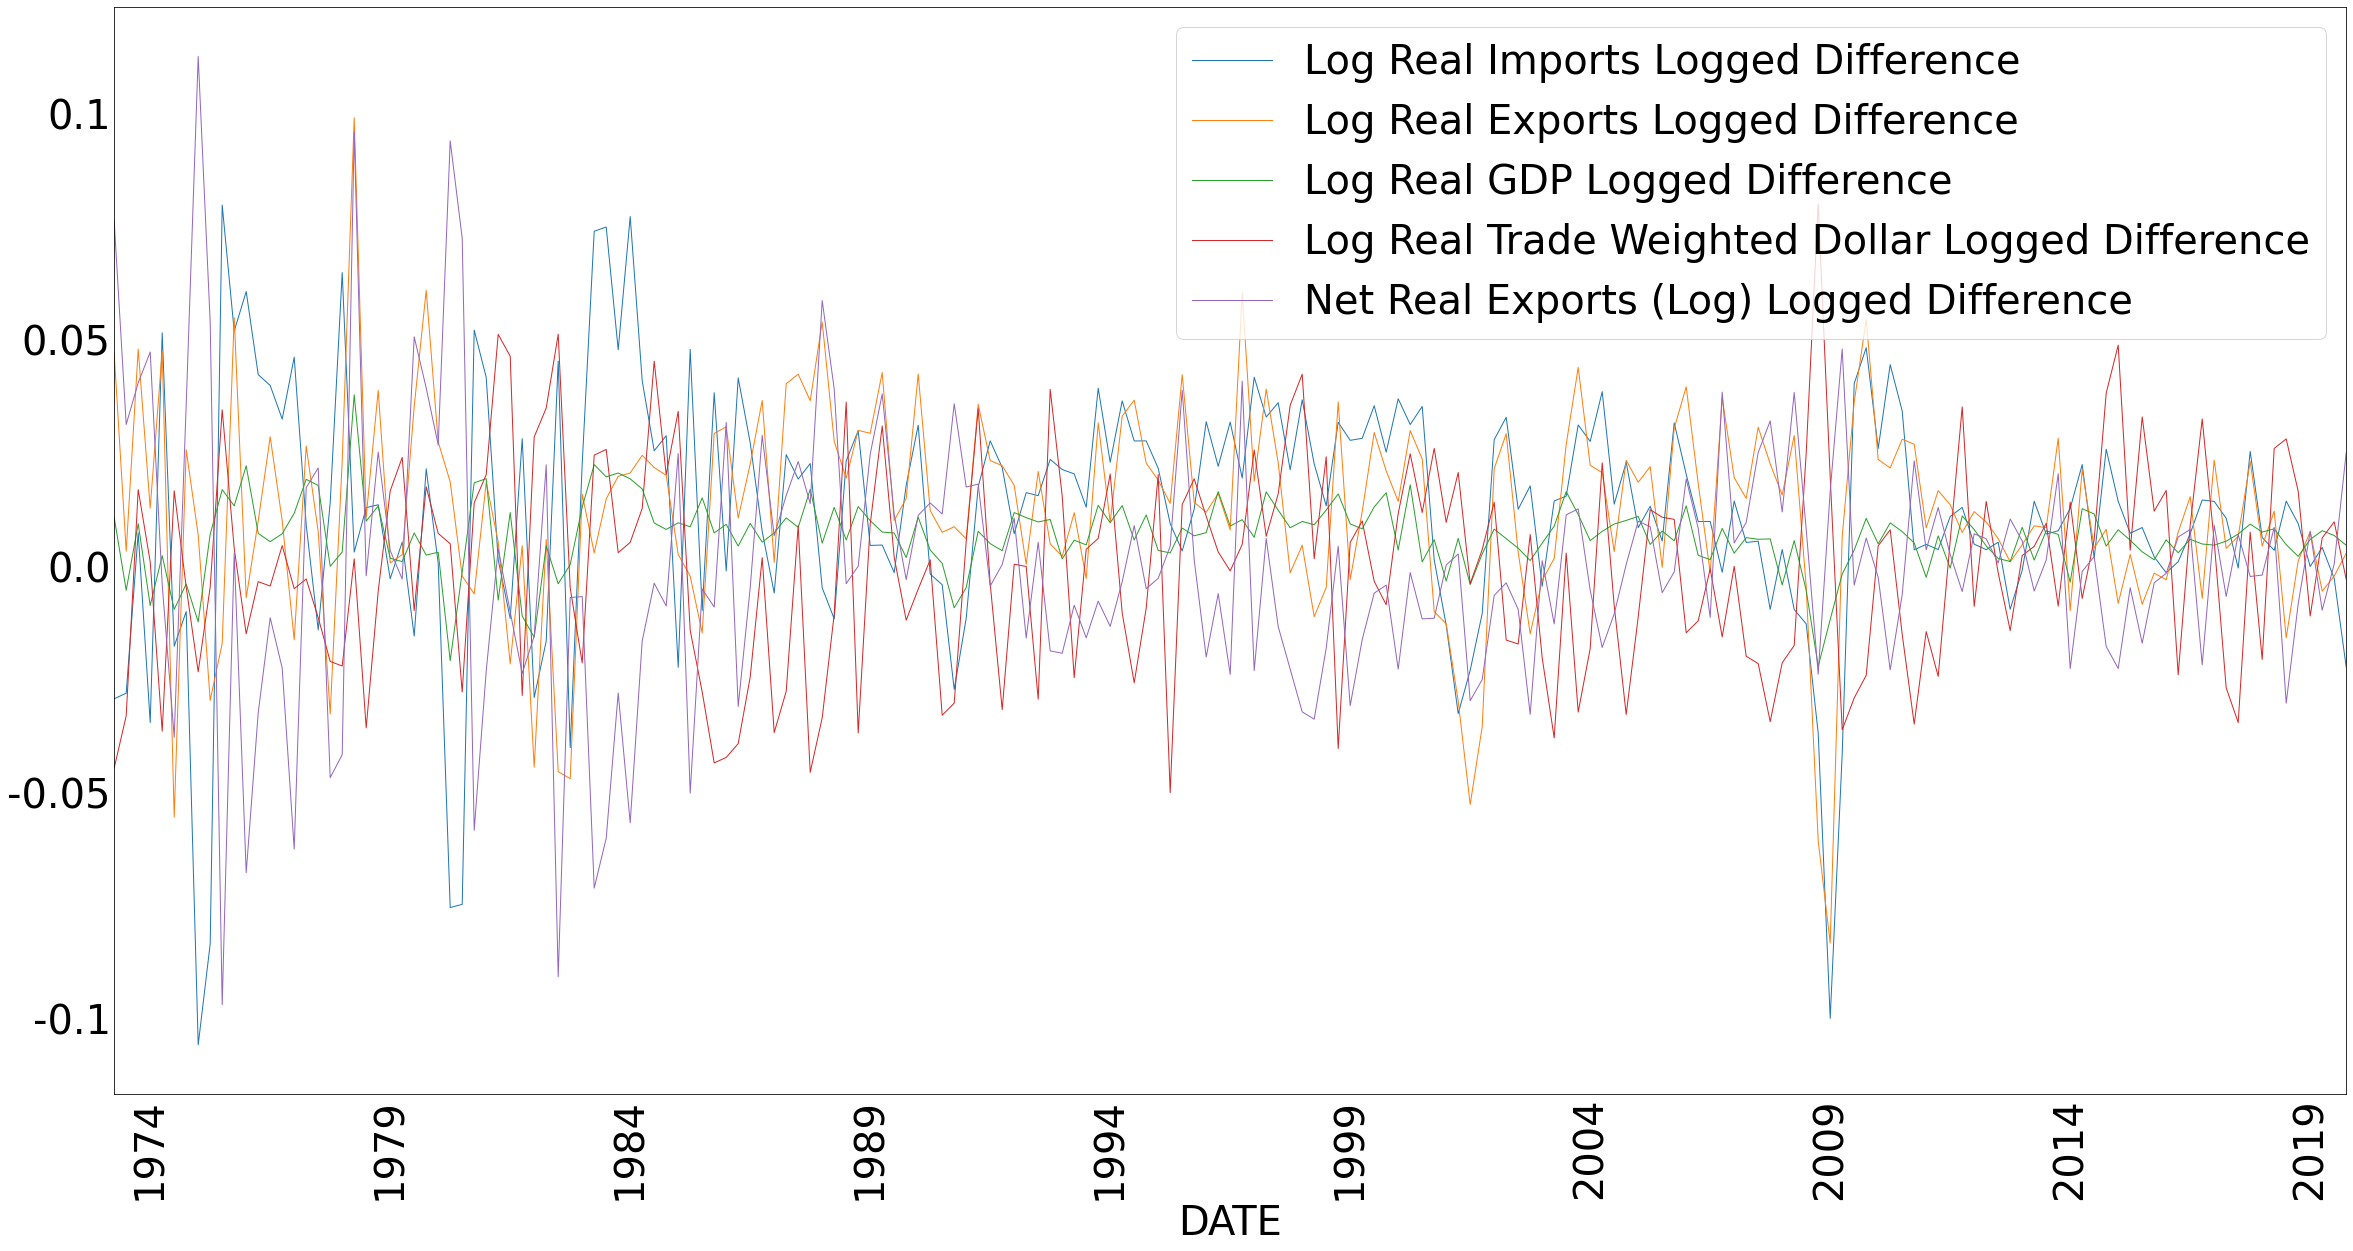

In [7]:
logged_diff_keys = data.keys()[-5:]
plot_lines(data[logged_diff_keys])

5.	Generate scatter plot of the log differenced values of Imports, Exports, and Real GDP (i.e., define one variable for the x-axis and the other for the y-axis). 

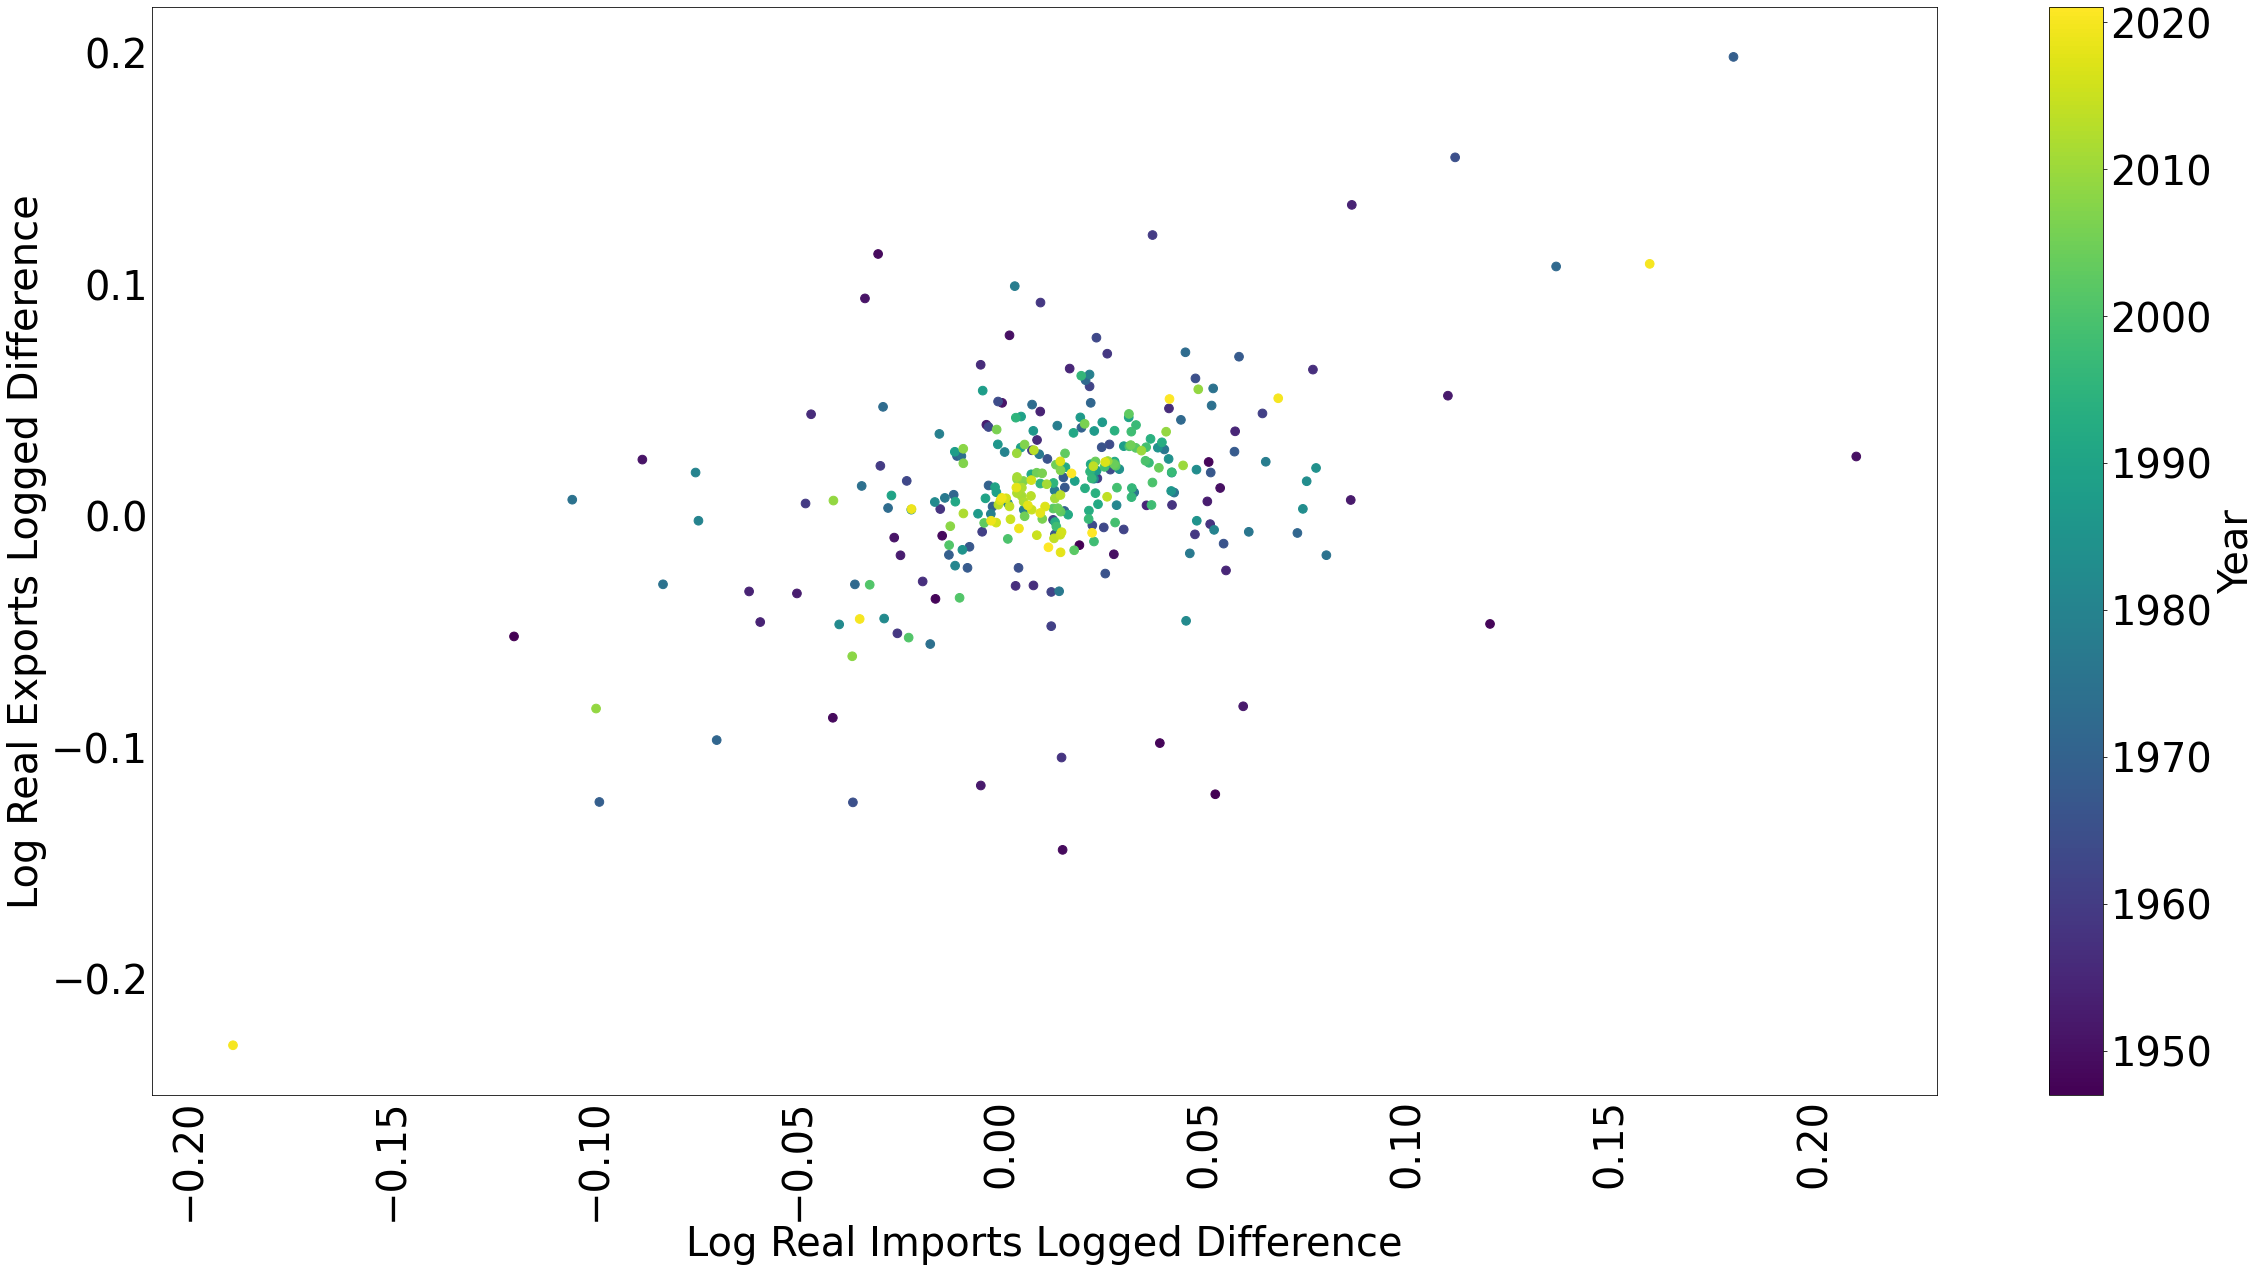

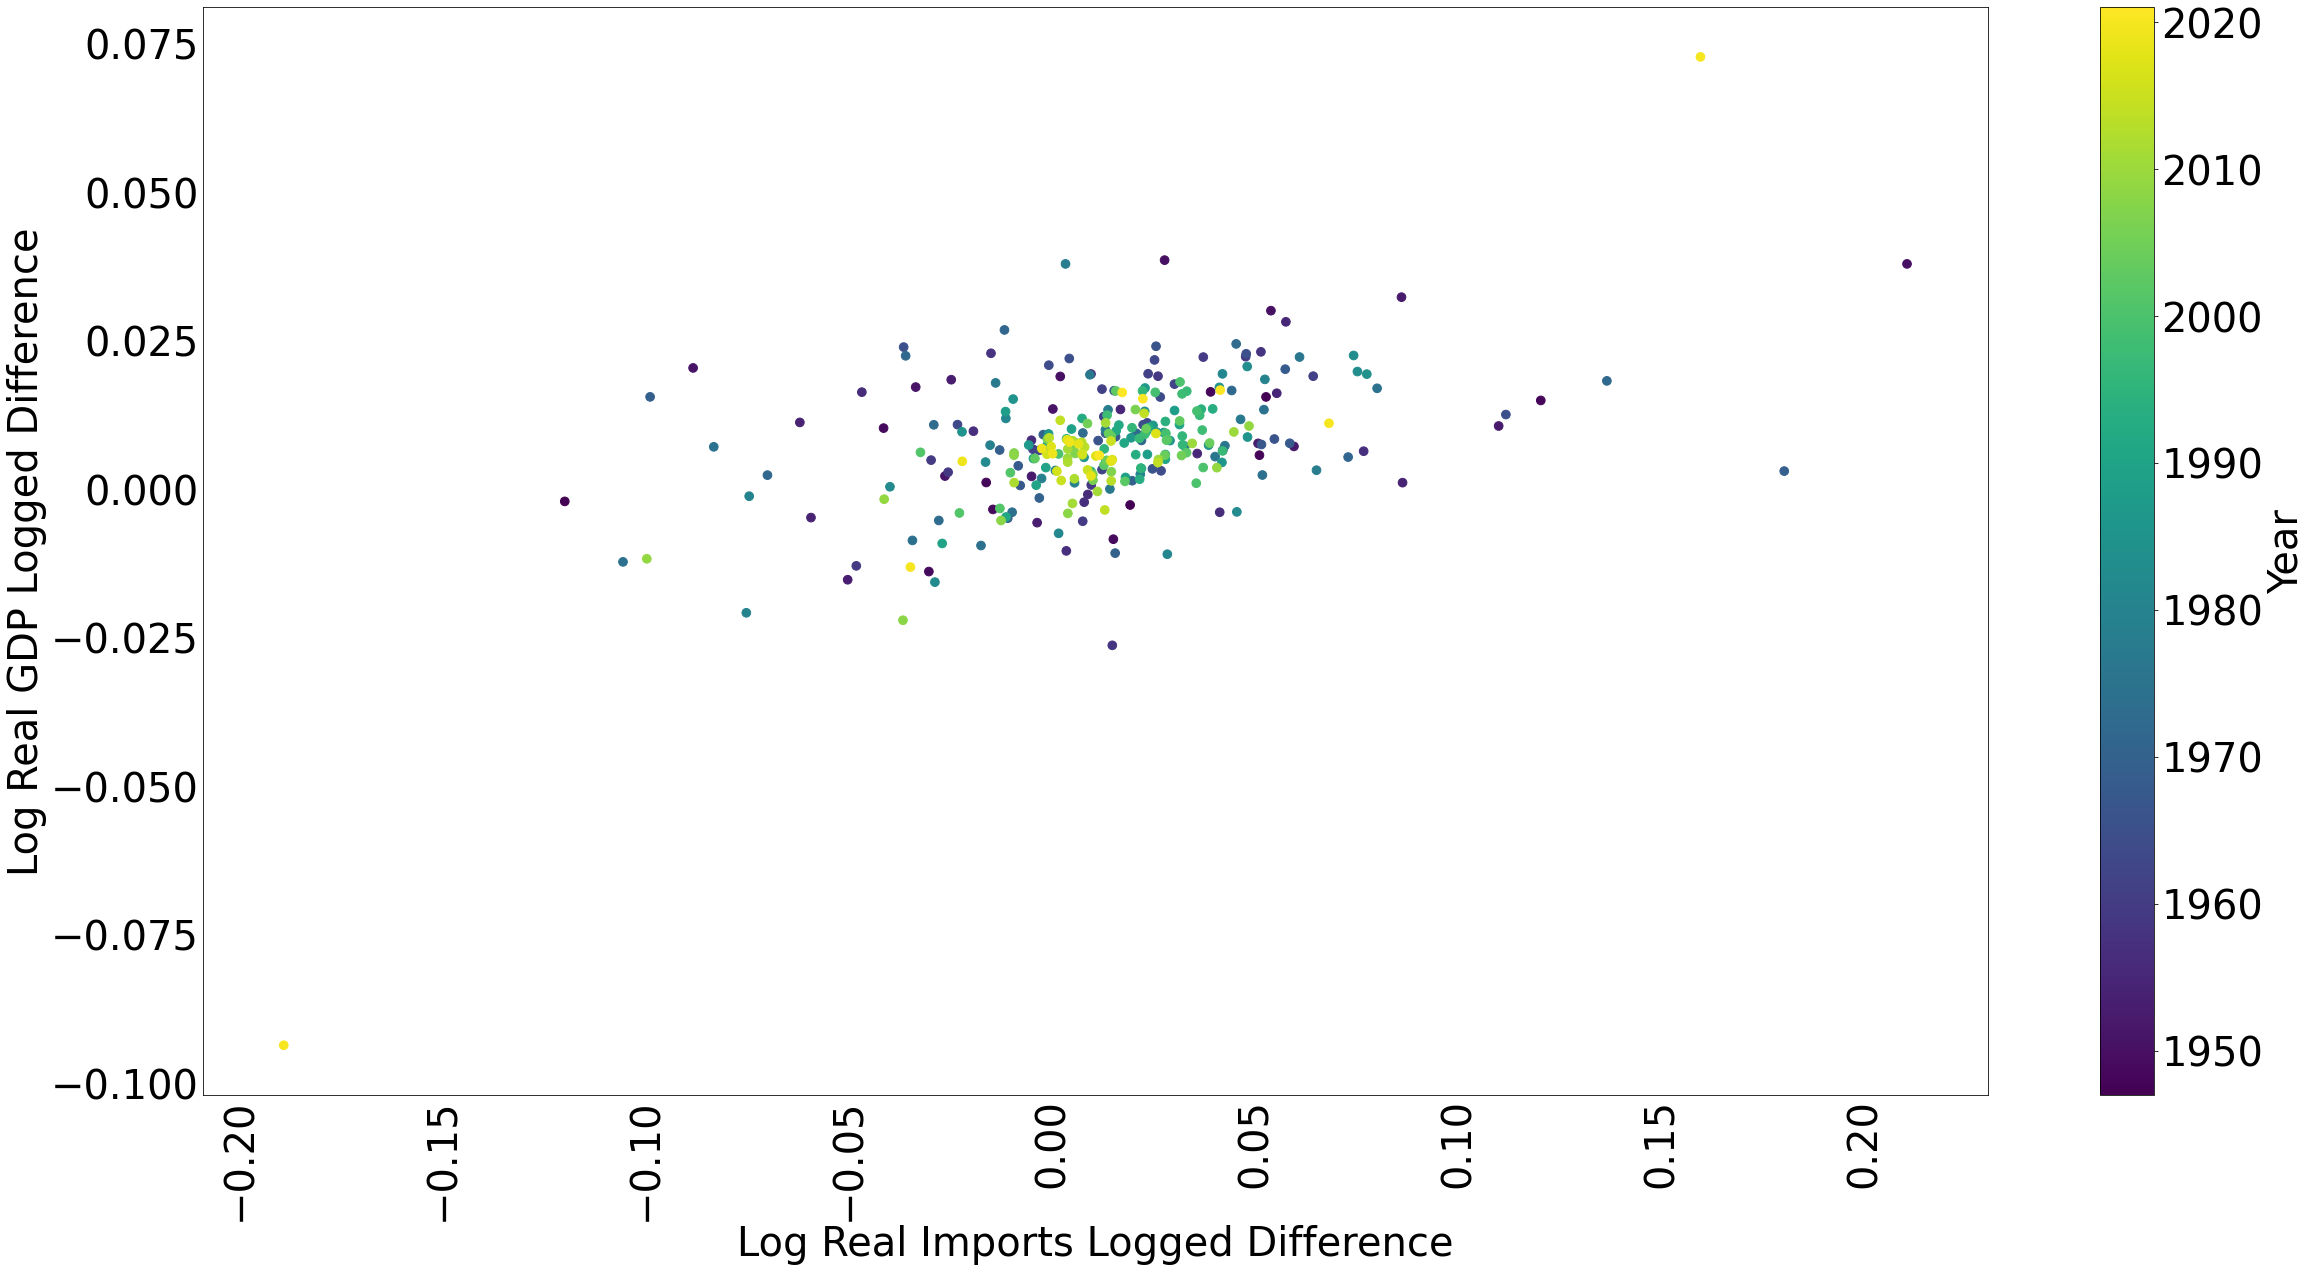

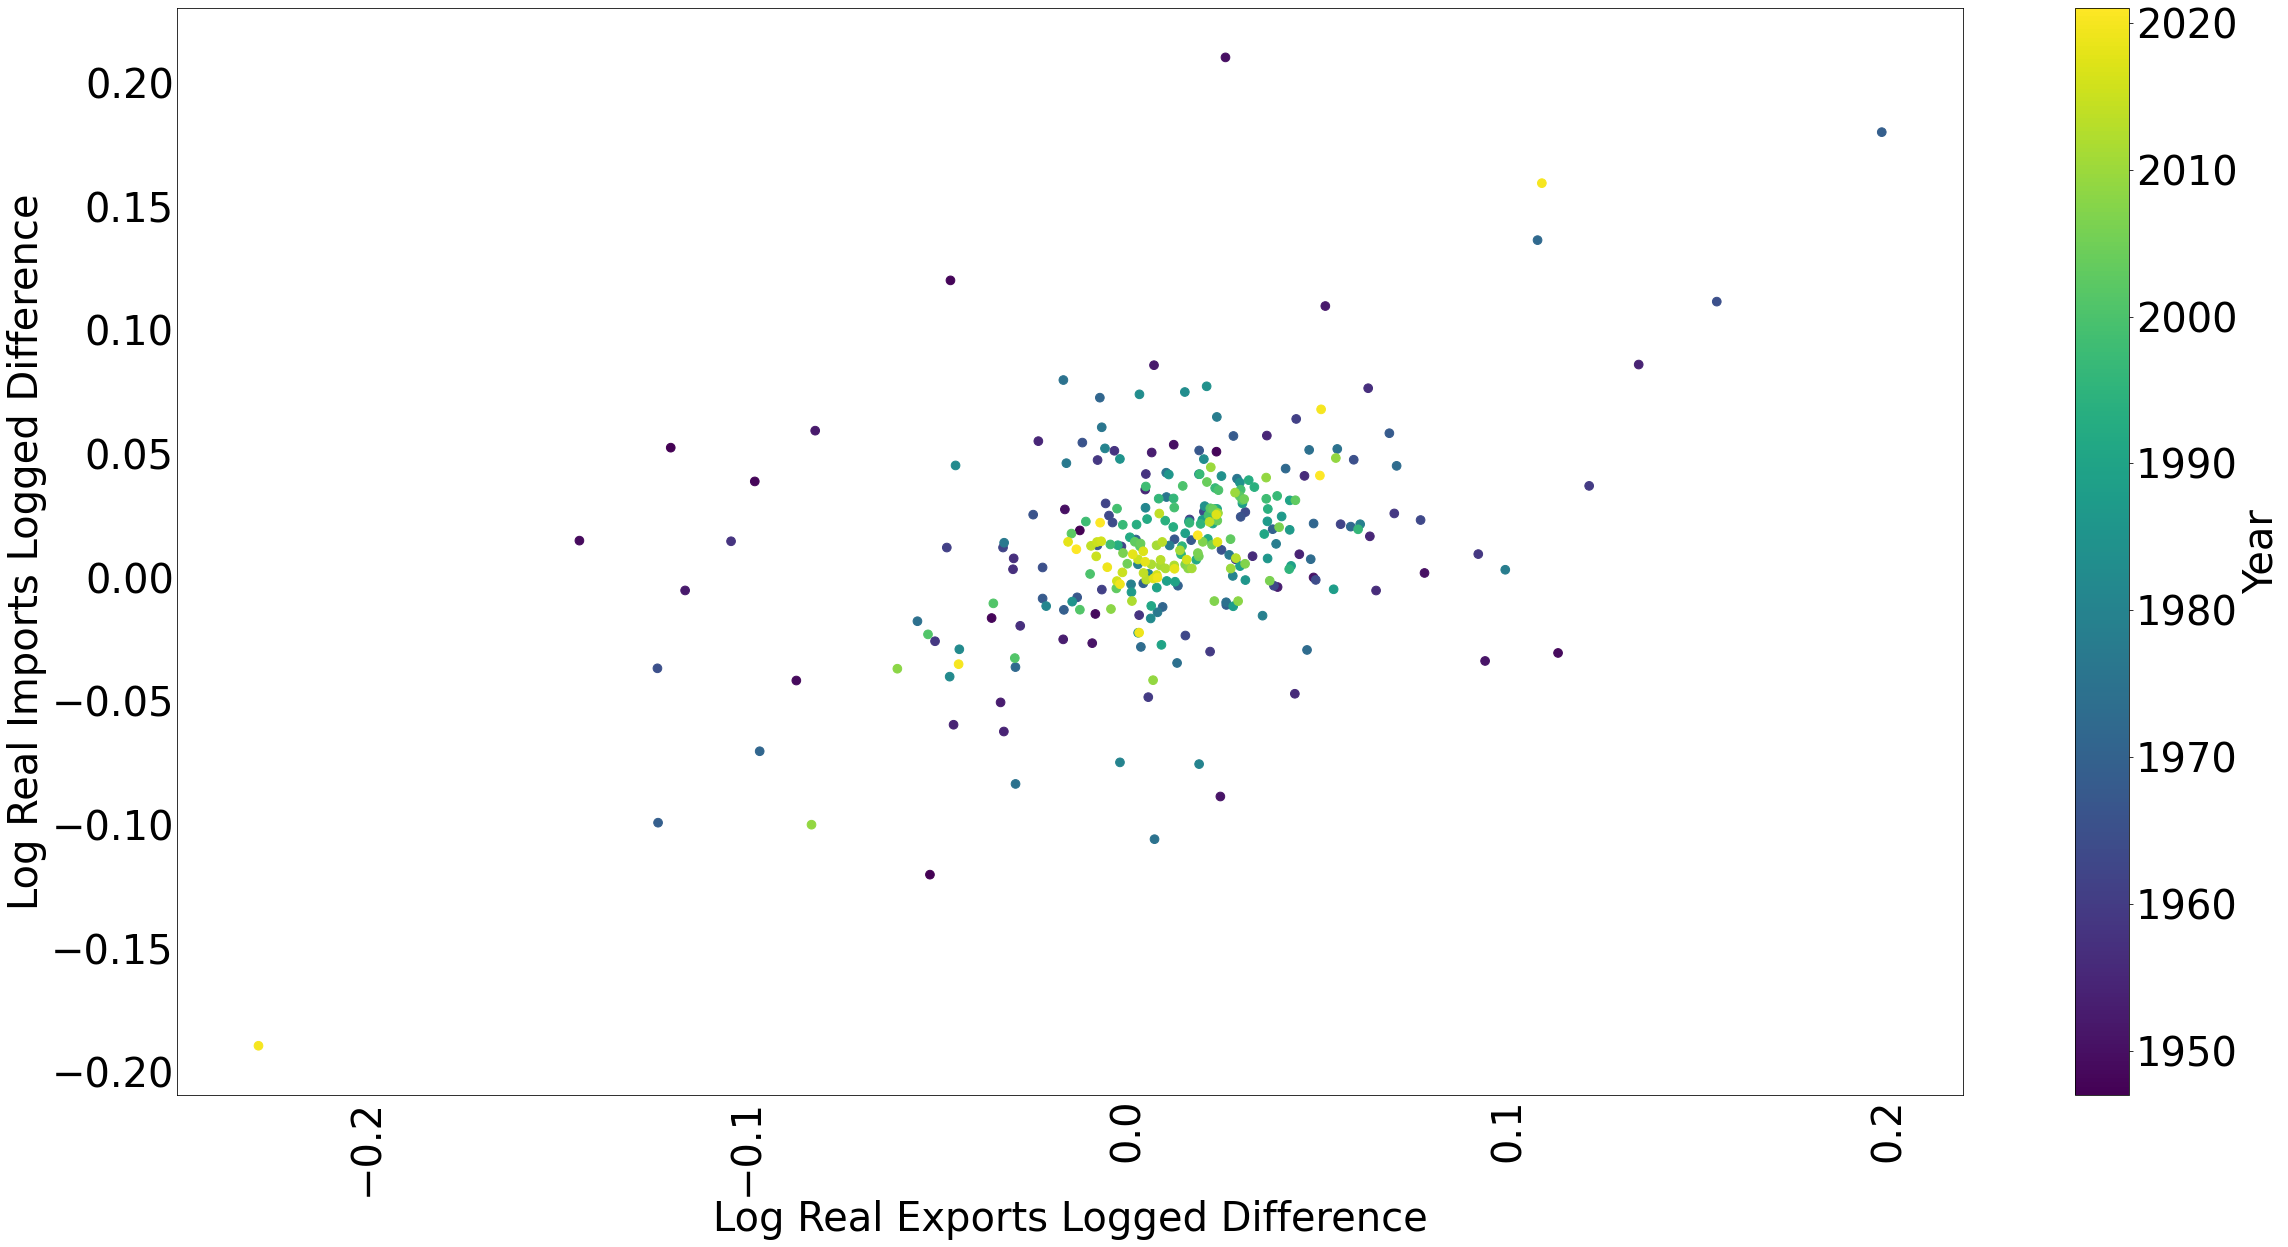

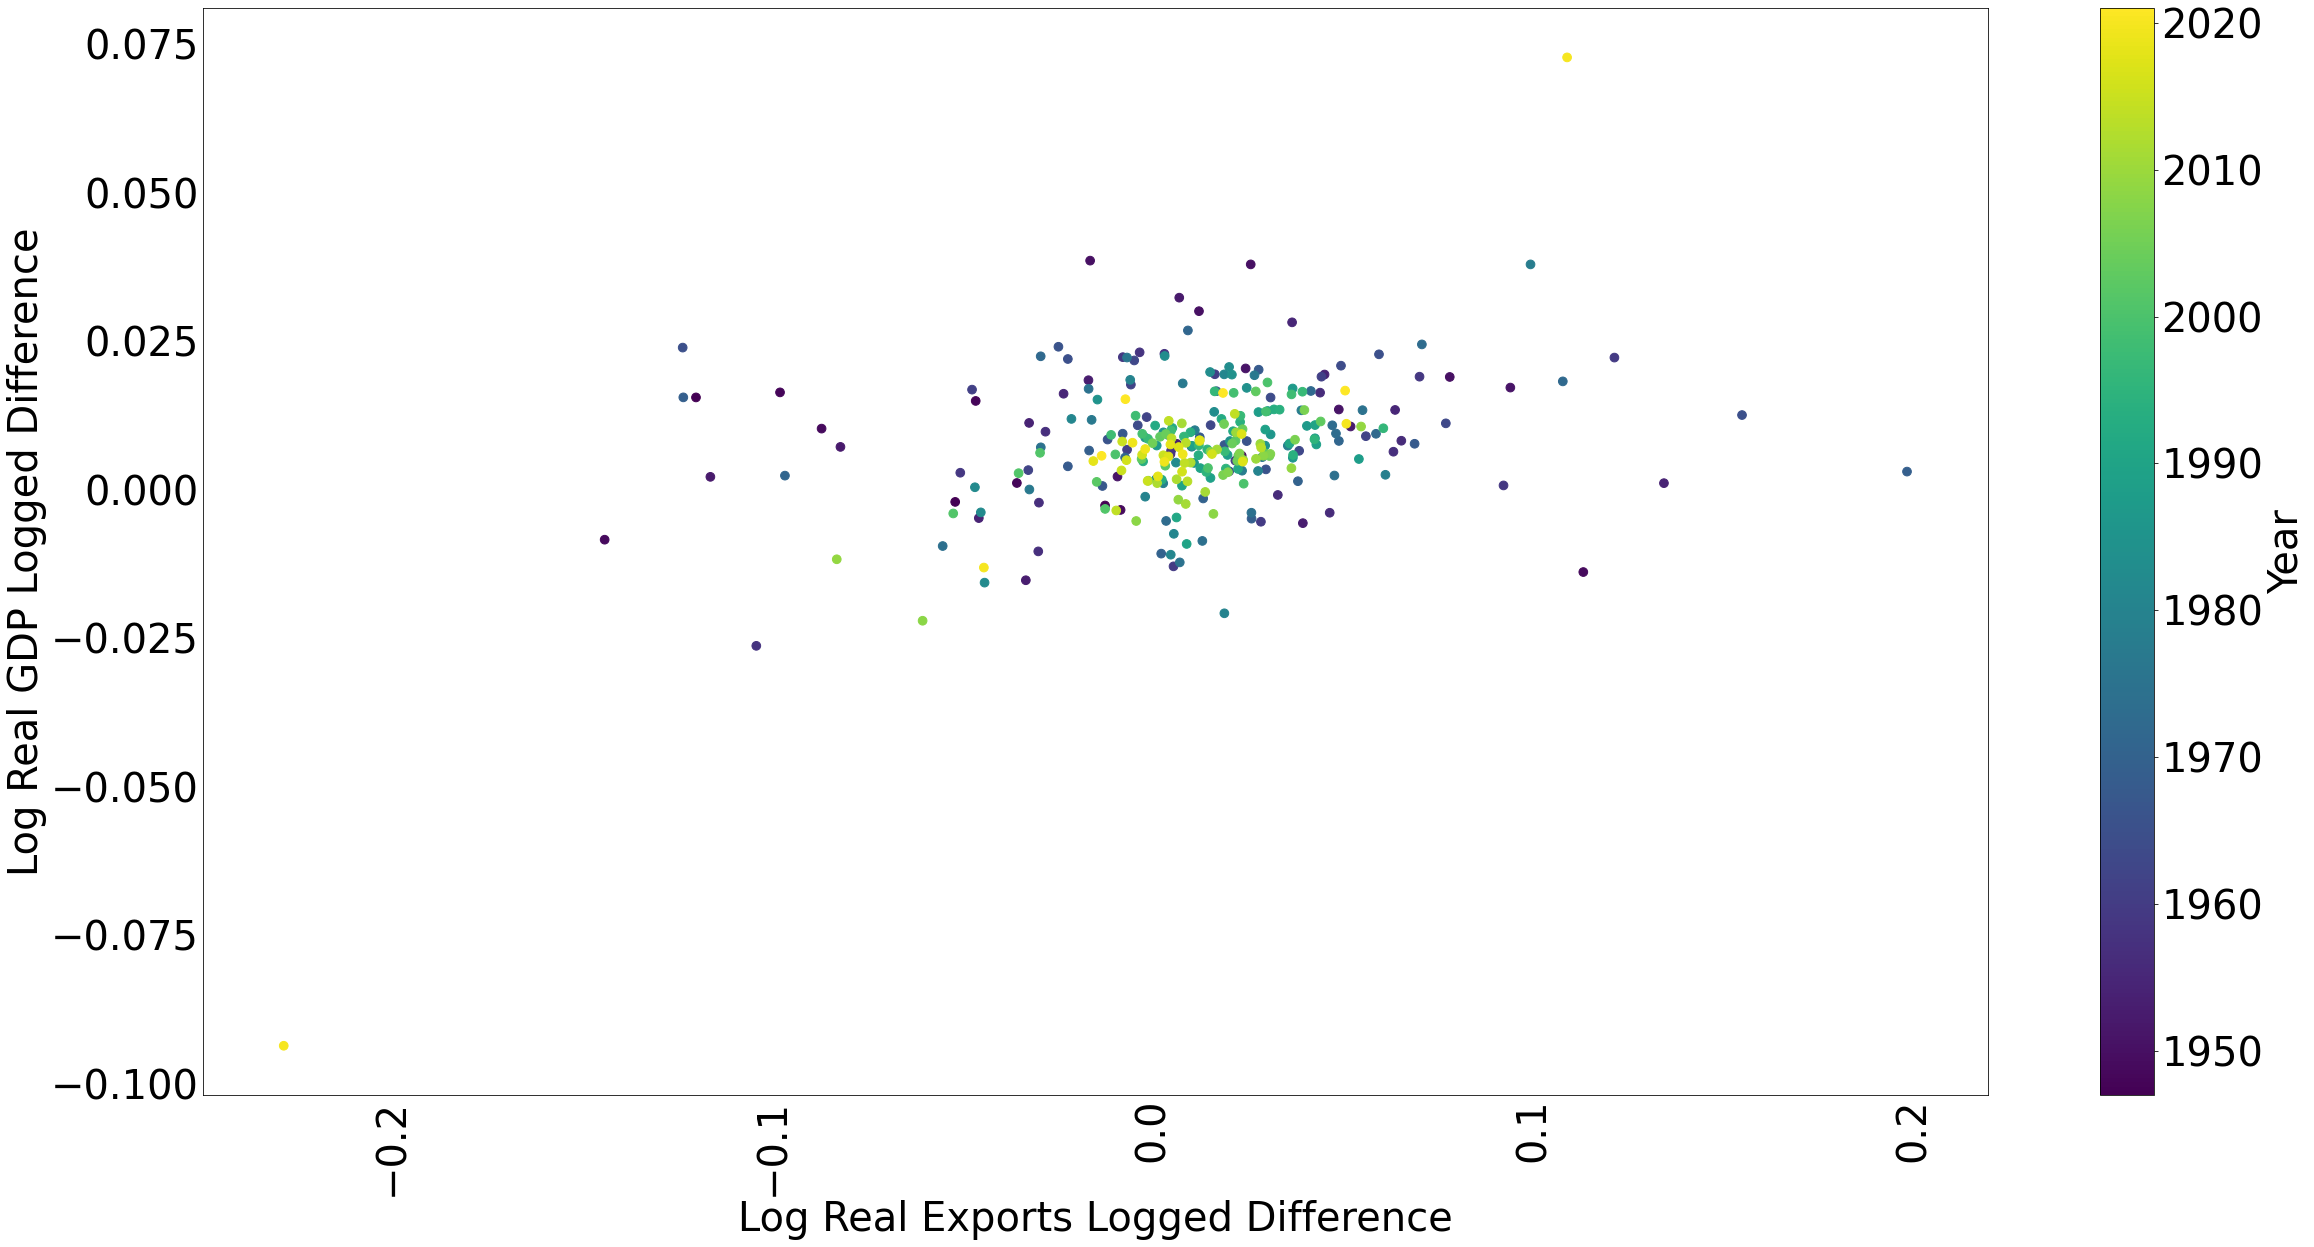

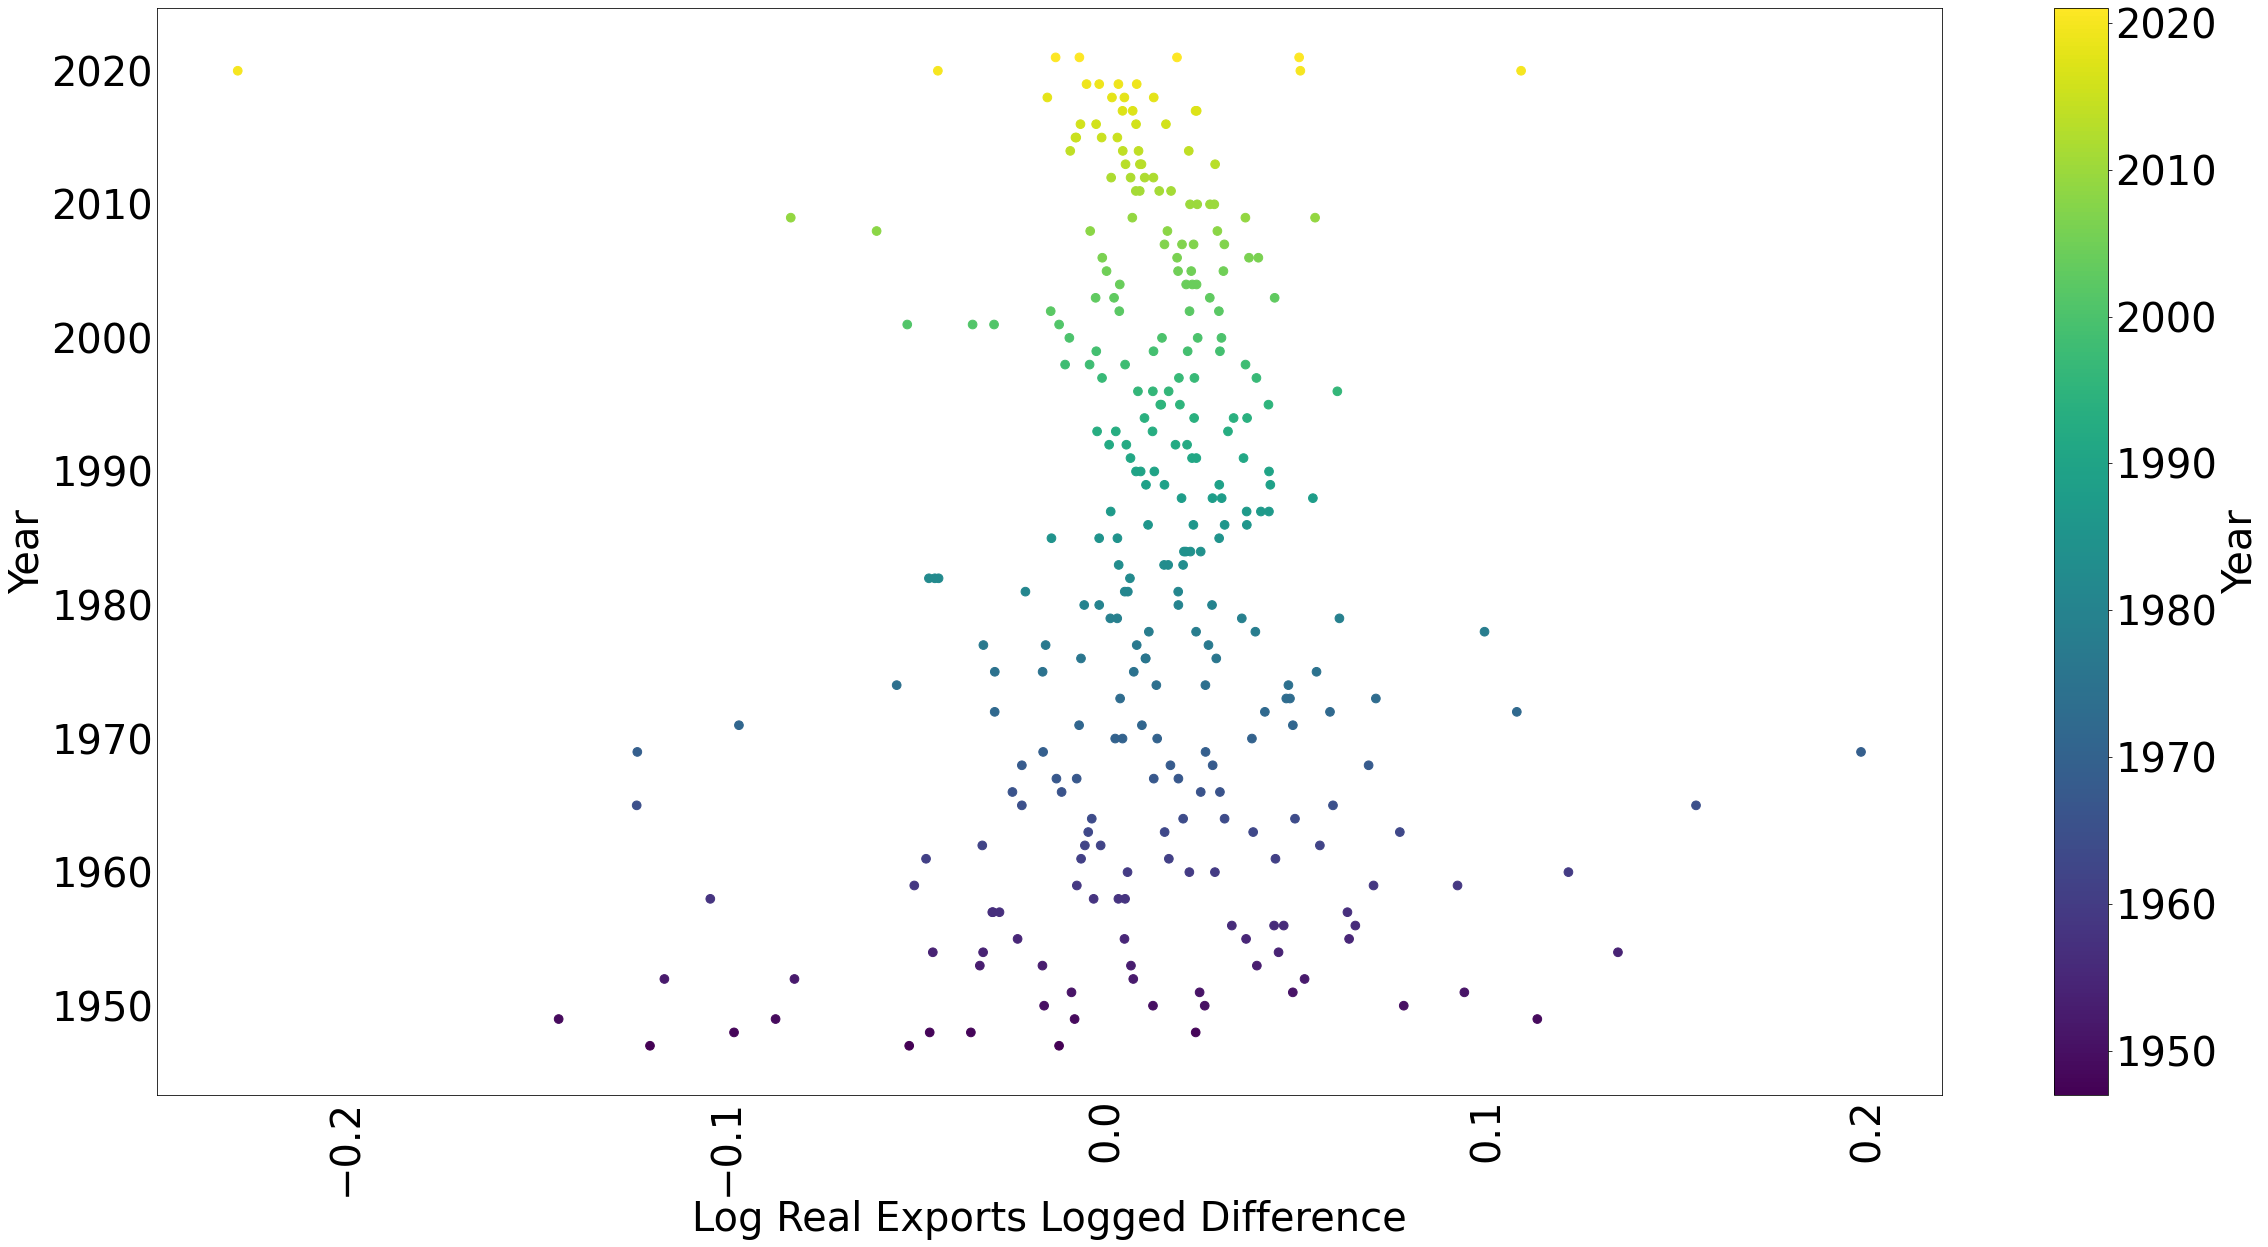

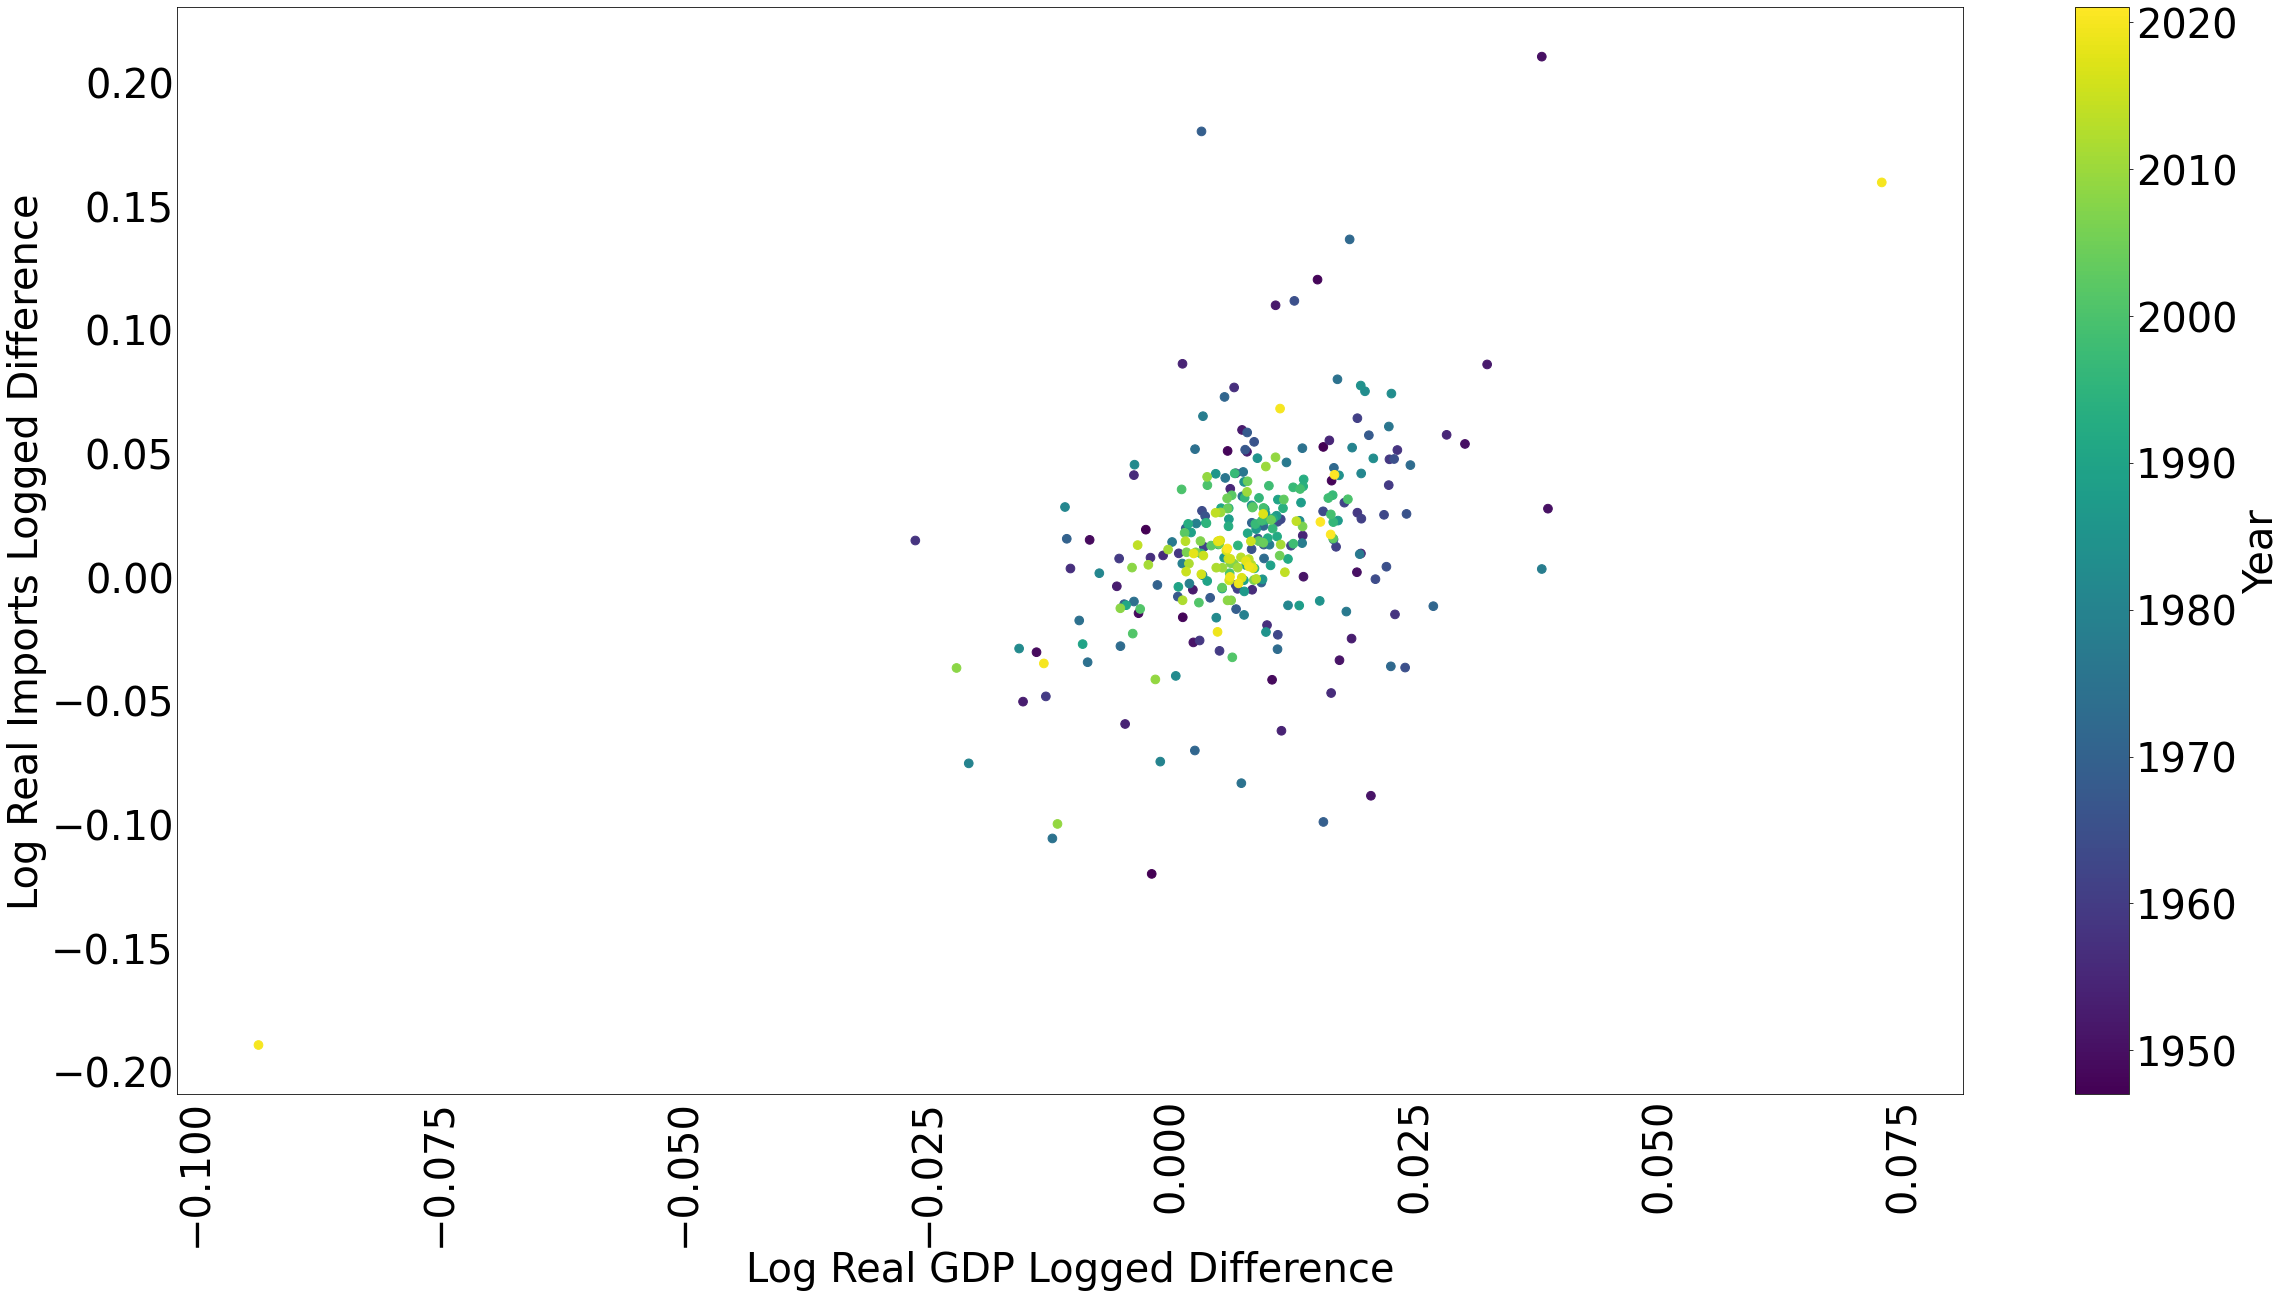

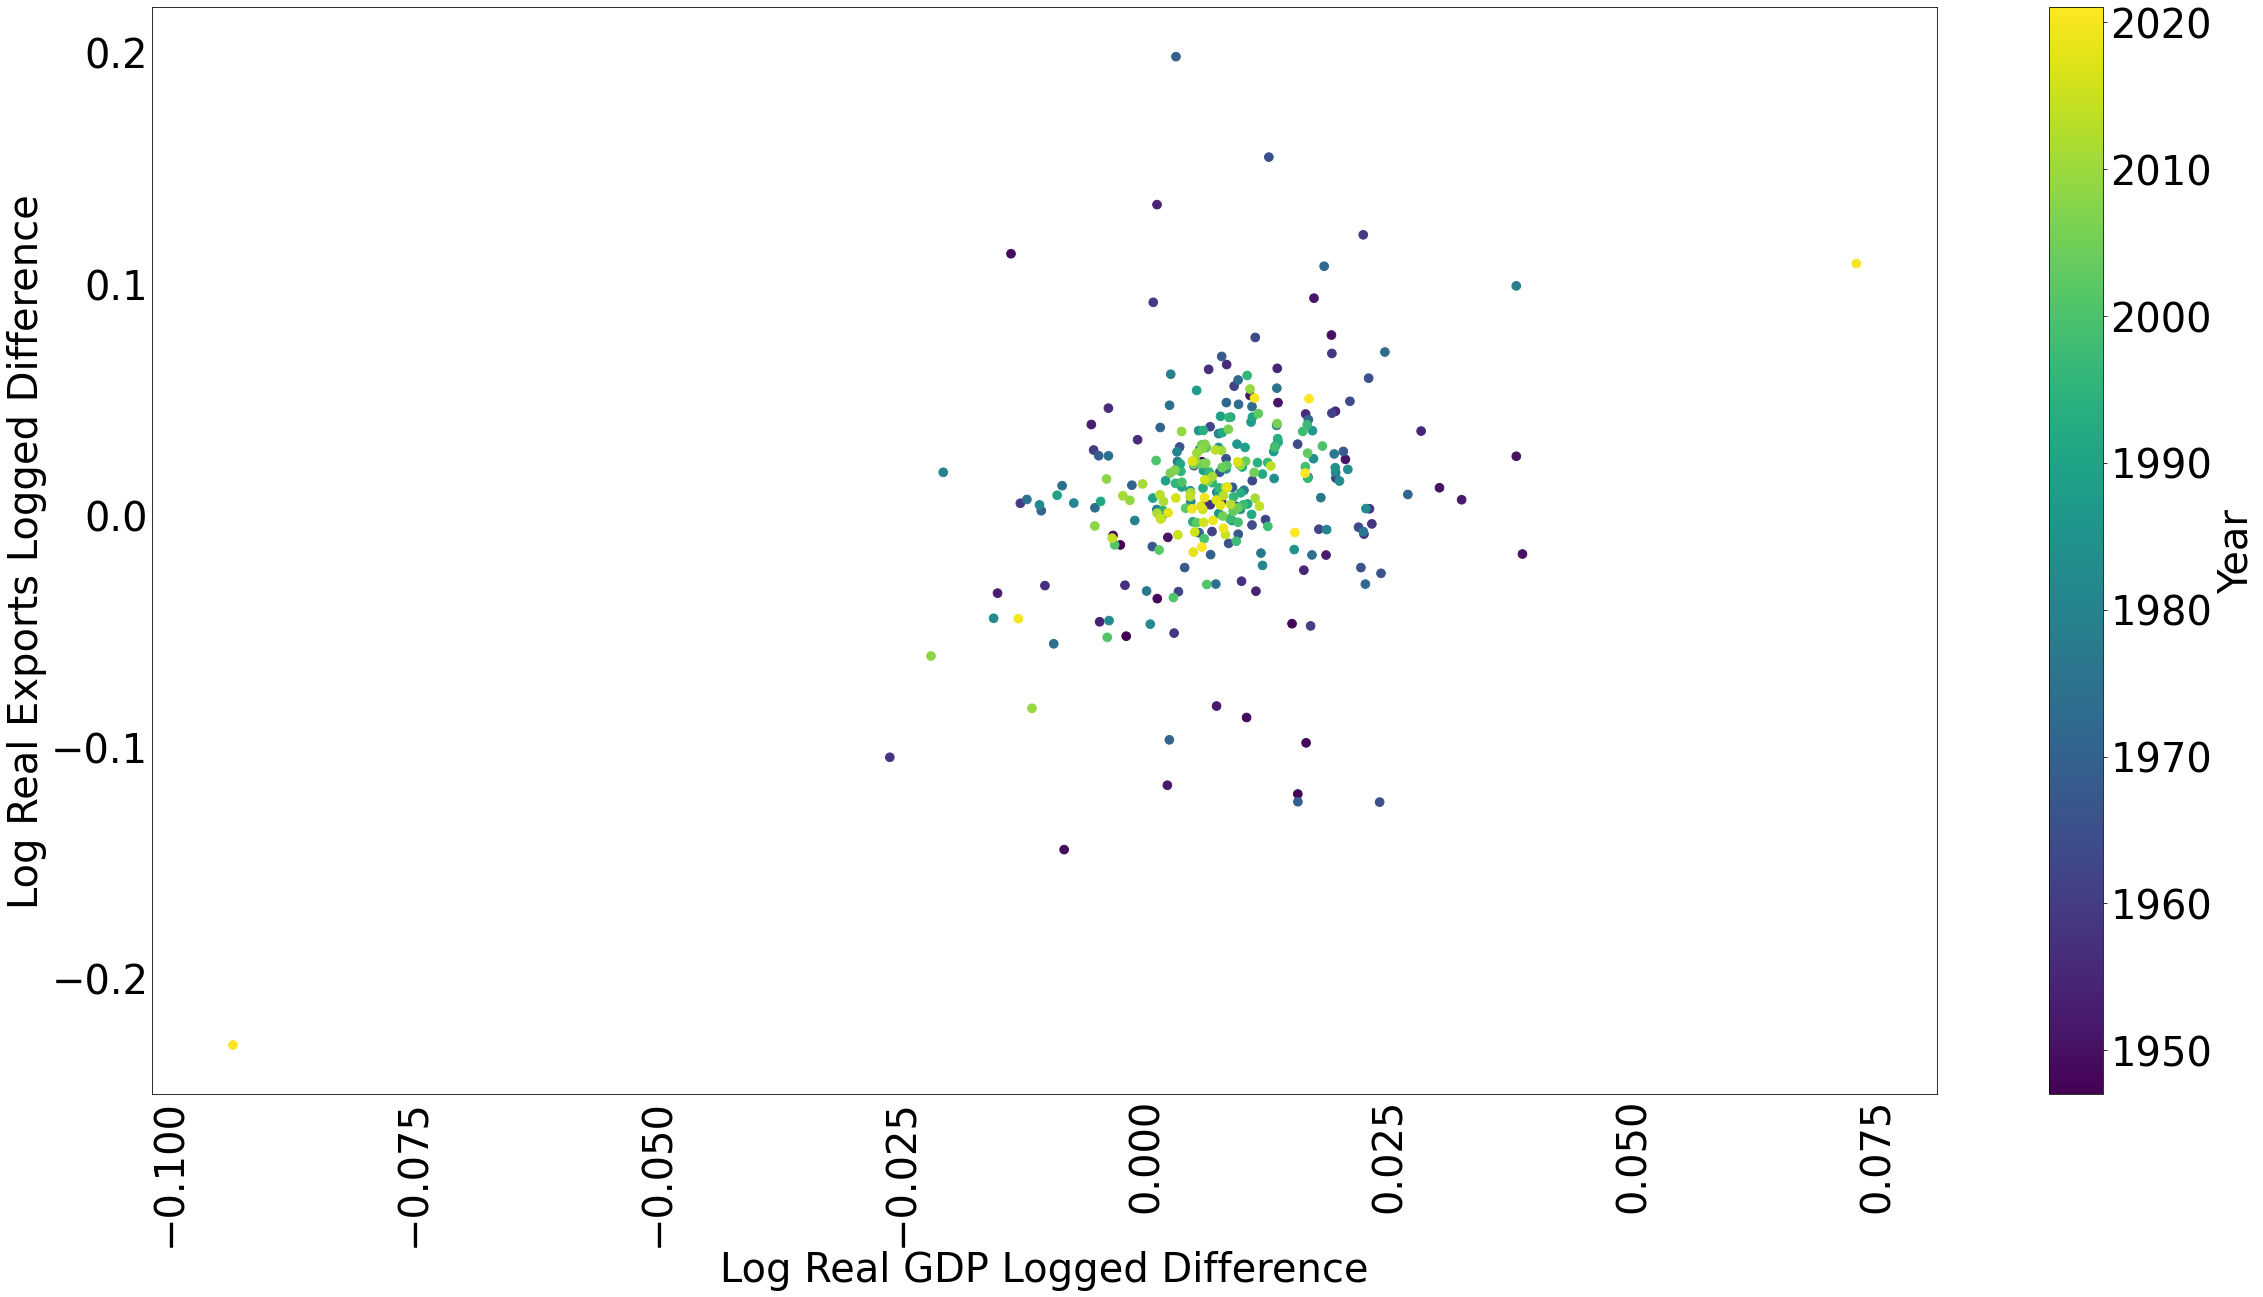

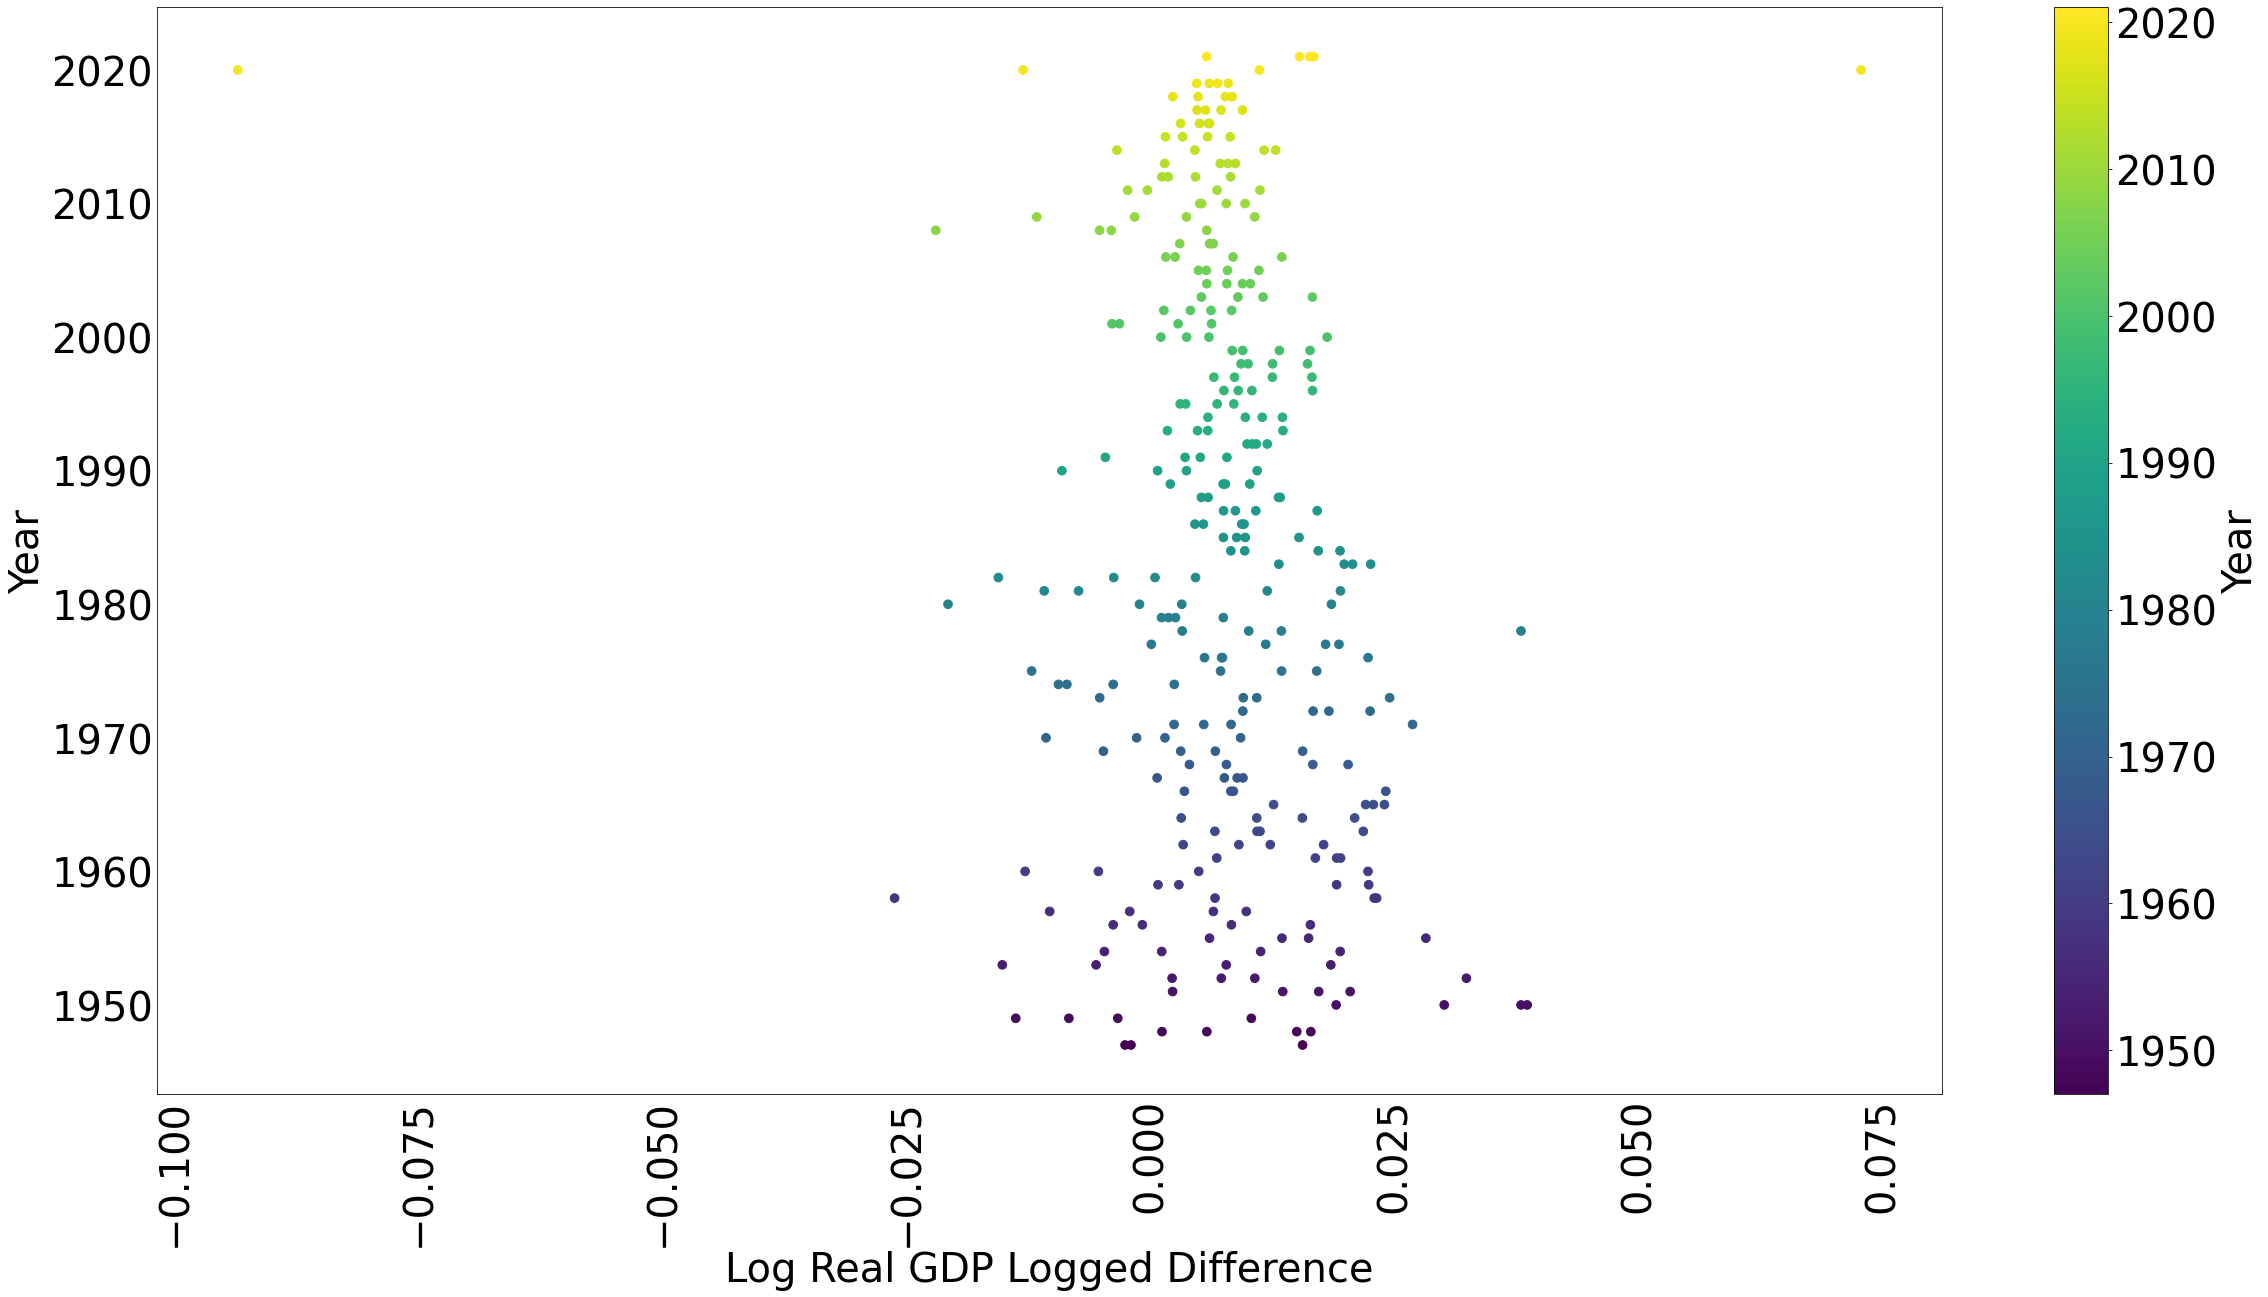

In [8]:
scatter_vars = ["Log Real Imports Logged Difference", "Log Real Exports Logged Difference", "Log Real GDP Logged Difference"]
plot_scatter(data[scatter_vars])

6.	Are real imports and real exports positively or negatively correlated?

Positivelty. There is a slight upward slope on the scatter plot. This makes sense as trade amongst countries increases in unison leading to more imports and exports. 

7.	Create a scatter plot of log differenced values for Net Real Exports and the Real Trade Weighted U.S. Dollar Index.

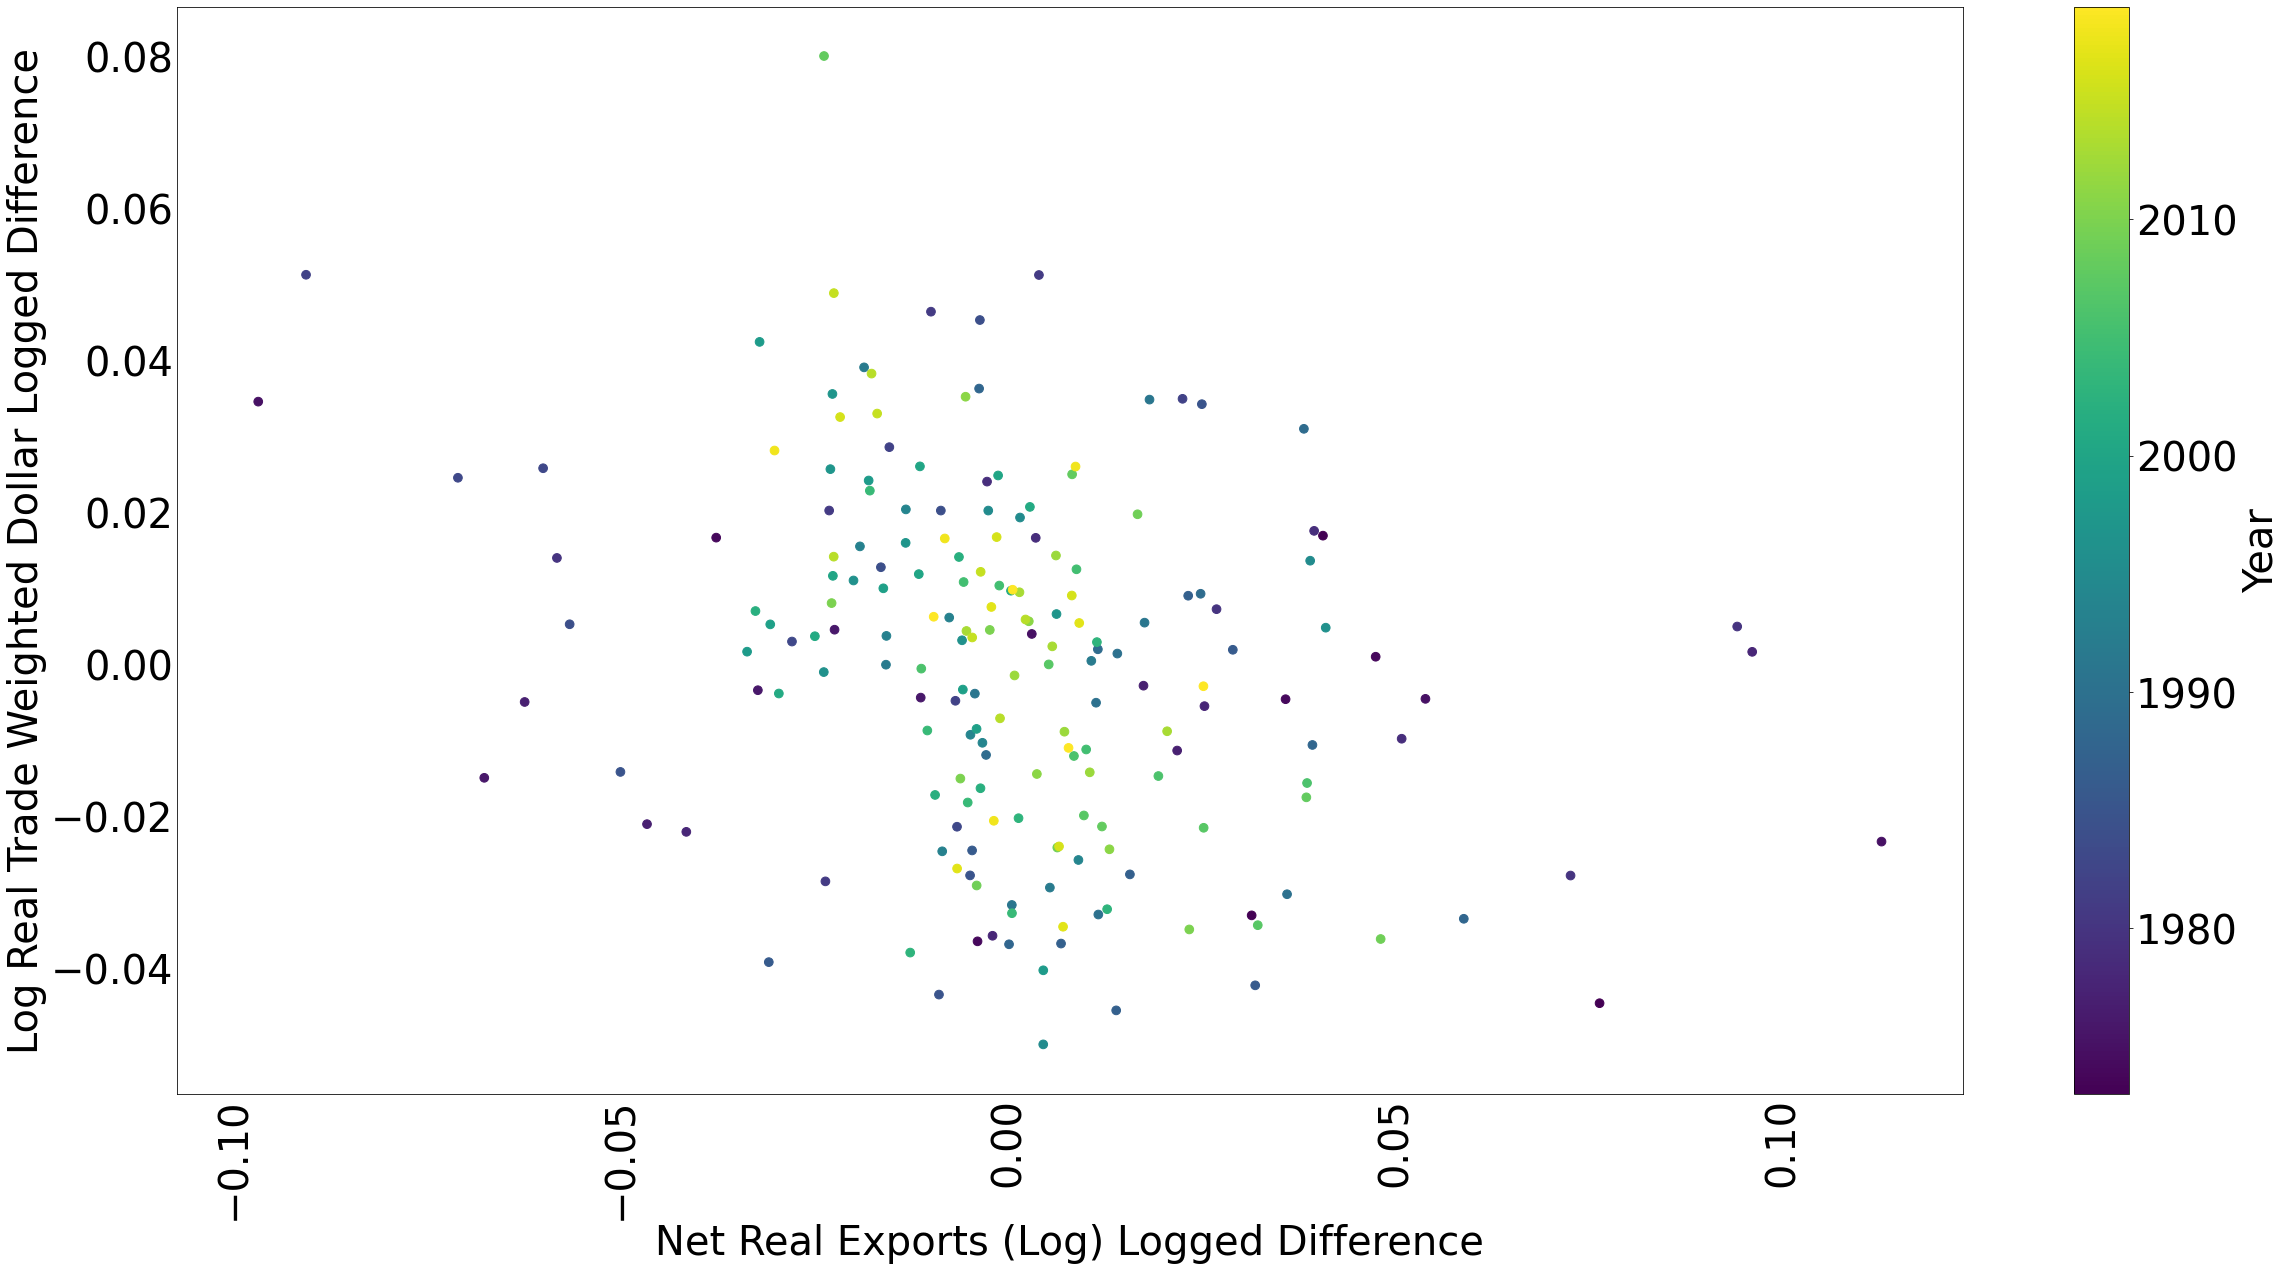

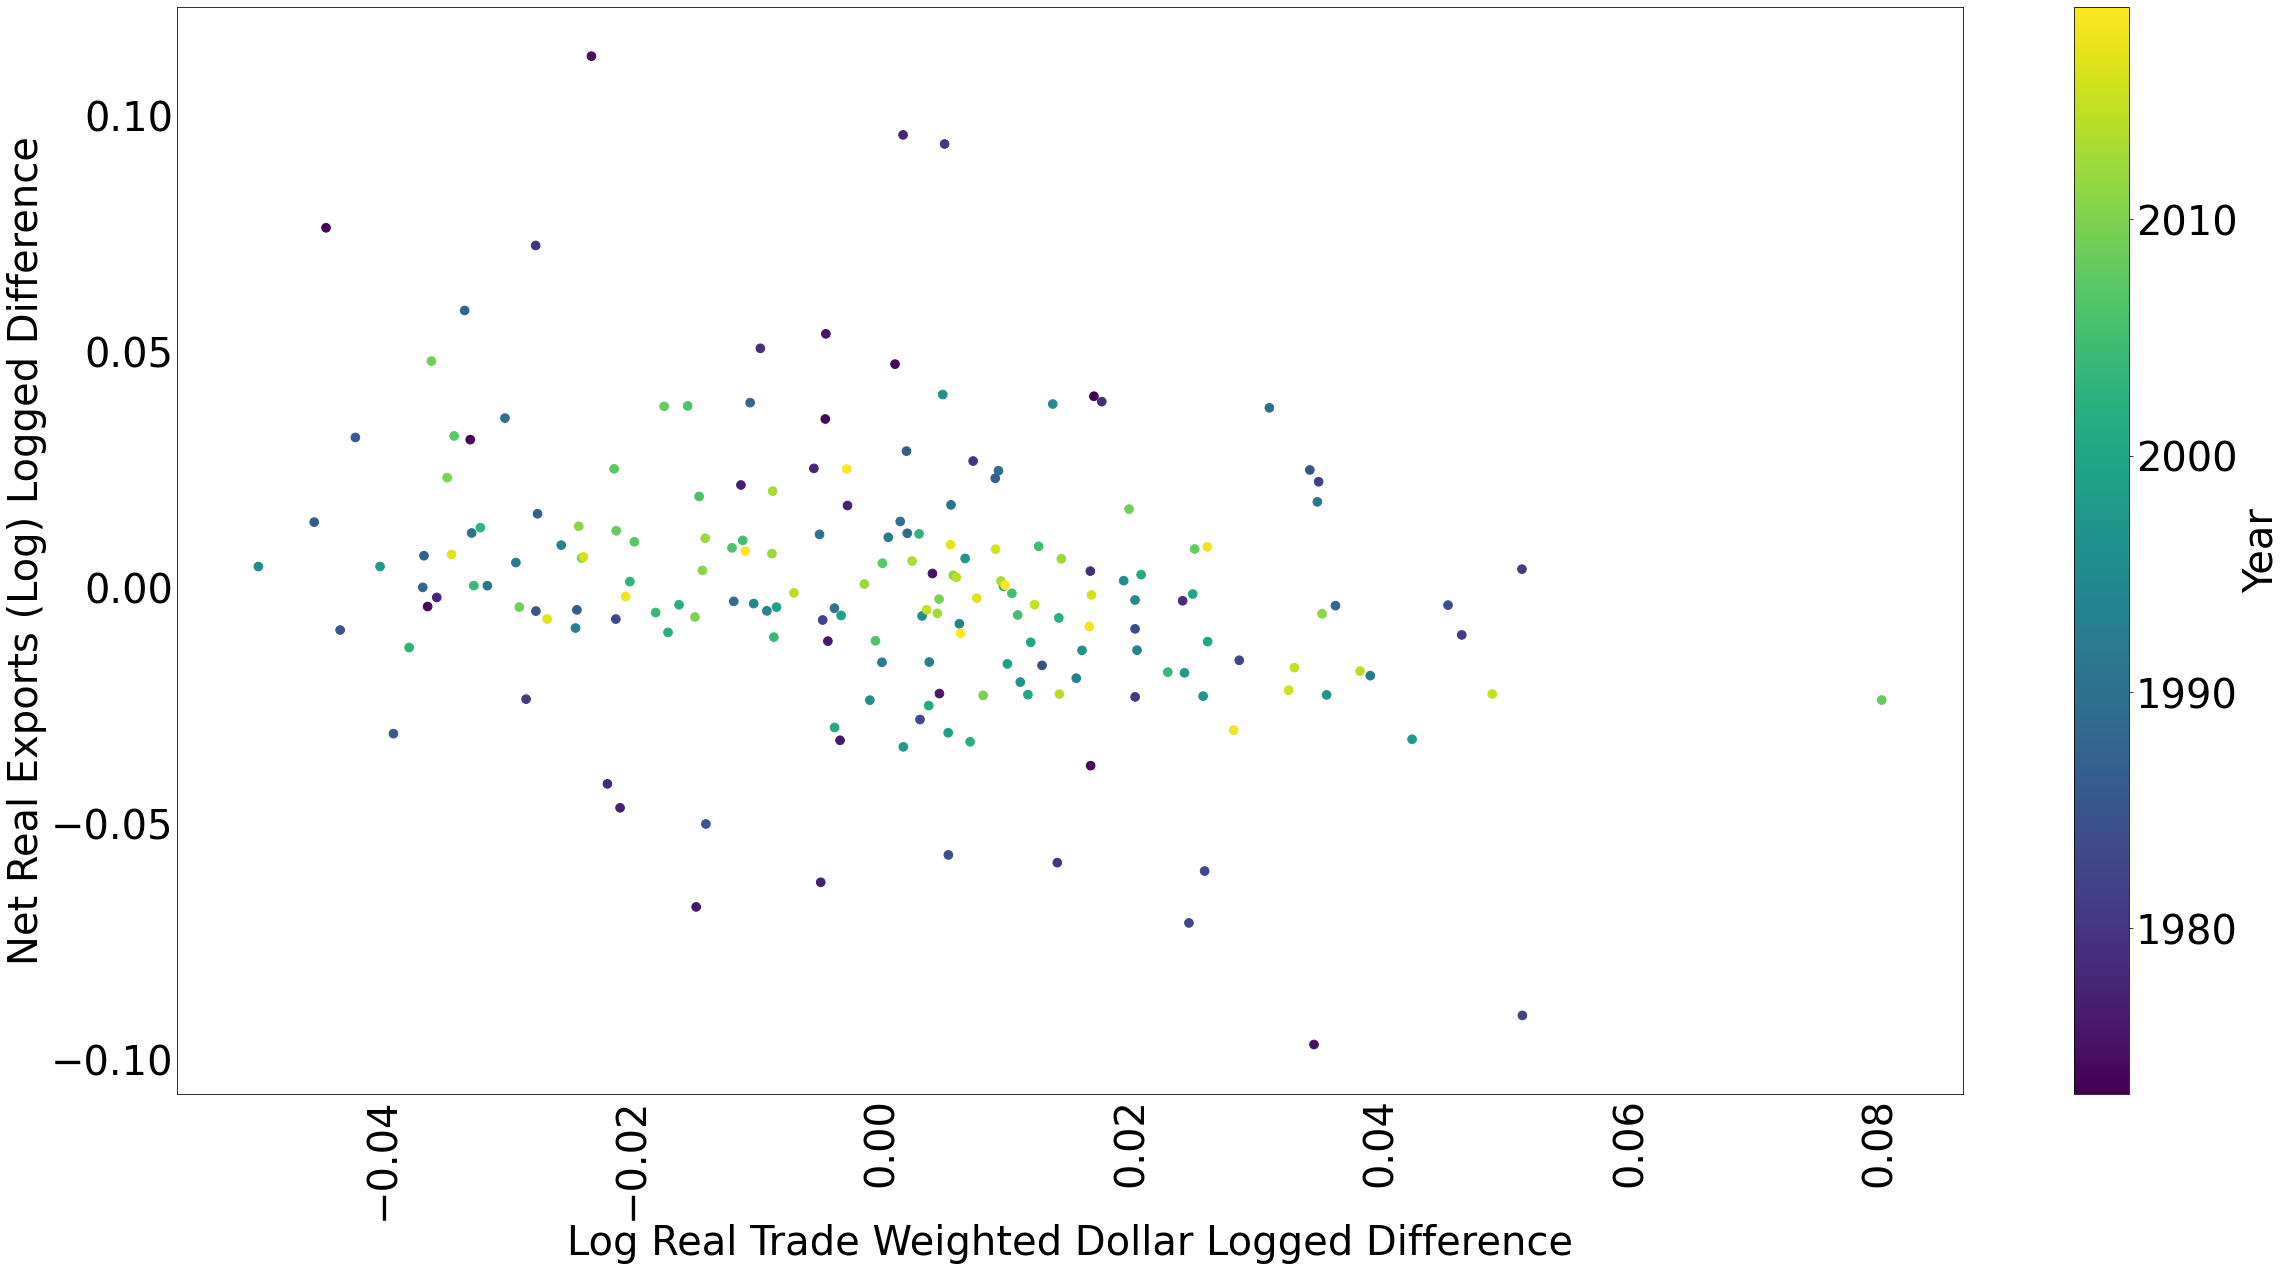

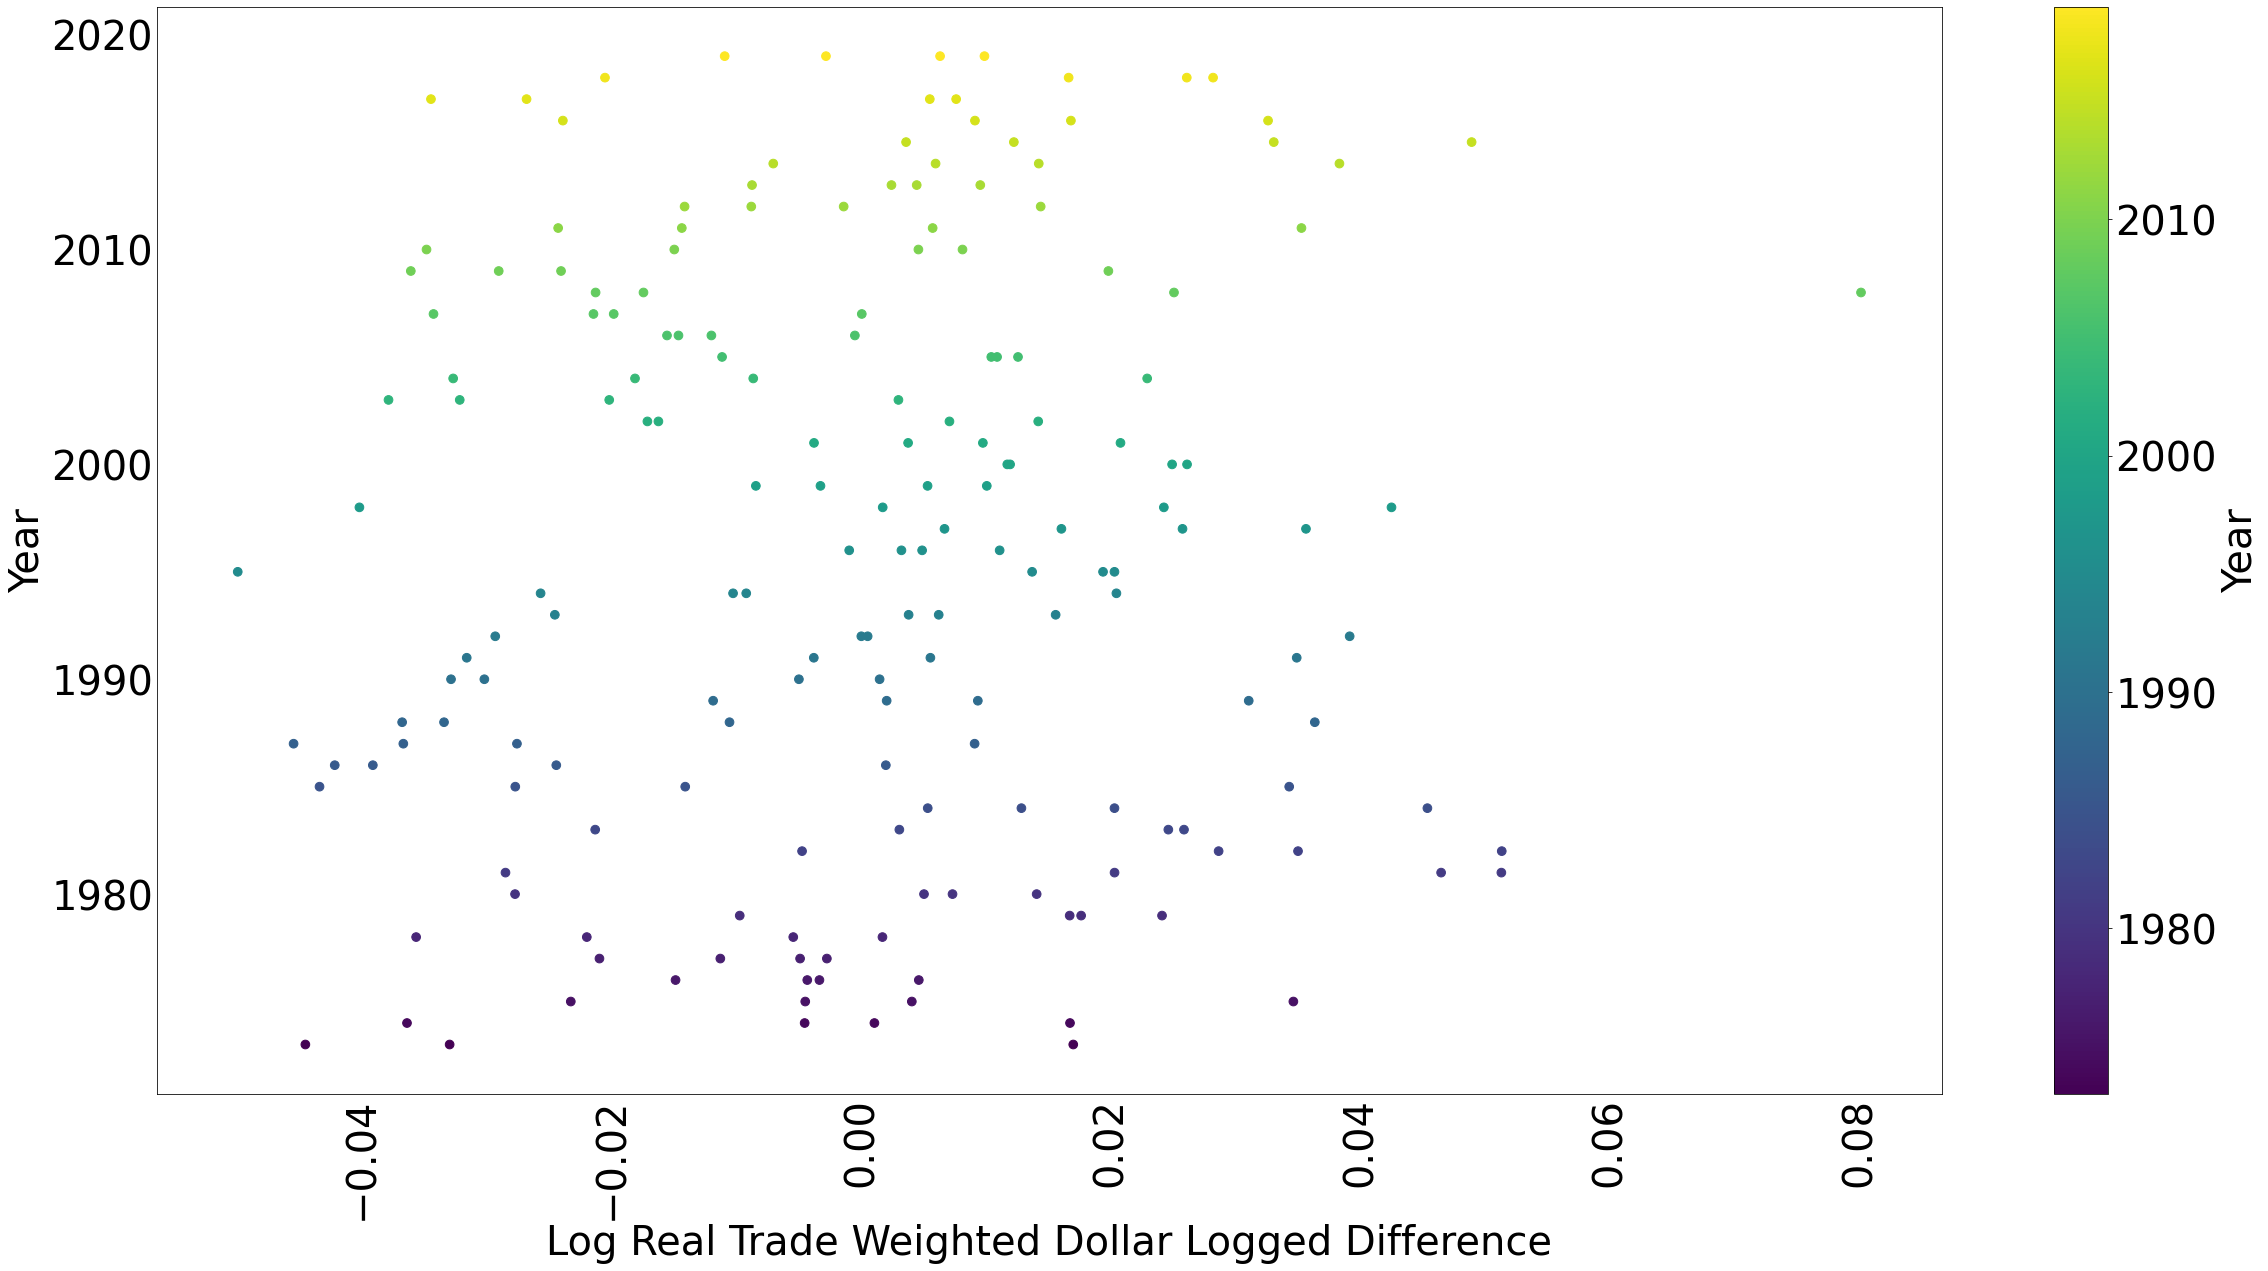

In [9]:
scat_vars = ["Net Real Exports (Log) Logged Difference", "Log Real Trade Weighted Dollar Logged Difference"]
plot_scatter(data[scat_vars])

9. Do changes in the level of imports or the level of exports appearto be impacted by changes in the value of the dollar?

The scatter plots do not appear to suggest this as there is no clear trend line. Theoretically, imports should increase as the value of the dollar goes up because more foreign things can be bought with the same amount of US dollar. Conversely, exports should increase when the value of the dollar goes down. 

9.	Which do you think the data indicates is a more significant driver of the level of imports: real GDP or the value of the dollar as reflected by the Real Trade Weighted U.S. Dollar Index? Defend your answer.

The scatter plots showed a much clearer correlation between GDP and trade than between US dollar value and trade. Im not sure of the causal factor. If a country imports more, they are using more of the worlds comparative advantage and this could cause GDP to go up. So im not sure that I could argue that increases in GDP are causing increases in imports. But, when the value of the dollar drops, this could incentivise more imports and lead the US to take advantage of comparative advantage from other countries as far as producing goods leading to more imports. So theoretically the value of the dollar is more of a driver of trade than increases in GDP. 